## Retention Analysis

#### Varaiables
- **gender**:	Gender of Customer

- **age**:	Age of Customer

- **gross_income**:	Annual income

- **segment**:	Segment as specified by the bank

- **num_credit_cards**:	Number of credit cards issued (through cross sell)

- **tiprel_1mes**:	Customer Inactivity Flag at the beginning of the period (A-Active, I-Inactive)

- **ind_actividad_cliente**:	Customer Inactivity Flag at the end of the period (6 Months) (1-Active, 0-Inactive)

- **num_Products**:	Total number of financial products that the customer has bought (through cross sell)

- **num_loans**:	Total number loans disbursed to the customer (through cross sell)

- **duration**:	Number of days since customer


In [1]:
### Importing requied libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from statsmodels.stats.weightstats import ztest
from sklearn.mixture import GaussianMixture
from scipy.stats import mannwhitneyu

In [3]:
# importing data
json = pd.read_json("retention.json")
json.head()

0                  1                  2      \
gender                      M                  M                  M   
age                  21 years           23 years           24 years   
gross_income       $ 79070.91        $ 178270.68         $ 31243.56   
segment           Individuals  College_Graduated  College_Graduated   
num_credit_cards            0                  0                  0   

                              3            4            5            6      \
gender                            M            M            F            F   
age                        24 years     31 years     32 years     43 years   
gross_income            $ 130740.54  $ 112975.17   $ 37318.56   $ 131281.5   
segment           College_Graduated  Individuals  Individuals  Individuals   
num_credit_cards                  0            0            0            0   

                        7            8                  9      ...  \
gender                      M            F                  M  ...   
age                  48 years     36 years           26 years  ...   
gross_income       $ 184641.6  $ 164347.86         $ 27311.31  ...   
segment           Individuals          VIP  College_Graduated  ...   
num_credit_cards            0            0                  0  ...   

                        54020              54021        54022        54023  \
gender                      F                  M            F            F   
age                  66 years           24 years     65 years     46 years   
gross_income      $ 214340.37         $ 68385.87  $ 266600.04   $ 23037.99   
segment           Individuals  College_Graduated  Individuals  Individuals   
num_credit_cards            0                  0            1            0   

                              54024              54025        54026  \
gender                            M                  M            F   
age                        24 years           24 years     46 years   
gross_income              $ 75405.6         $ 47237.01  $ 106930.05   
segment           College_Graduated  College_Graduated  Individuals   
num_credit_cards                  0                  0            1   

                              54027              54028              54029  
gender                            M                  F                  M  
age                        24 years           27 years           20 years  
gross_income            $ 185323.05         $ 65246.79        $ 180678.48  
segment           College_Graduated  College_Graduated  College_Graduated  
num_credit_cards                  0                  0                  0  

[5 rows x 54030 columns]

###  Converting json to csv file

In [4]:
df=json.T
df.to_csv("retention.csv",index=False)
df.head()

gender       age gross_income            segment num_credit_cards  \
0      M  21 years   $ 79070.91        Individuals                0   
1      M  23 years  $ 178270.68  College_Graduated                0   
2      M  24 years   $ 31243.56  College_Graduated                0   
3      M  24 years  $ 130740.54  College_Graduated                0   
4      M  31 years  $ 112975.17        Individuals                0   

  tiprel_1mes ind_actividad_cliente num_Products num_loans duration  
0           I                     0            1         0     1035  
1           I                     0            1         0     1097  
2           I                     1            1         0     1866  
3           I                     0            1         0     1440  
4           I                     0            0         0      376

### Data Check

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54030 entries, 0 to 54029
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 54030 non-null  object
 1   age                    54030 non-null  object
 2   gross_income           54030 non-null  object
 3   segment                54030 non-null  object
 4   num_credit_cards       54030 non-null  object
 5   tiprel_1mes            54030 non-null  object
 6   ind_actividad_cliente  54030 non-null  object
 7   num_Products           54030 non-null  object
 8   num_loans              54030 non-null  object
 9   duration               54030 non-null  object
dtypes: object(10)
memory usage: 6.6+ MB


In [6]:
df.isnull().sum() 

gender                   0
age                      0
gross_income             0
segment                  0
num_credit_cards         0
tiprel_1mes              0
ind_actividad_cliente    0
num_Products             0
num_loans                0
duration                 0
dtype: int64

In [7]:
### No null values

### These attributes are numbers : 
- age
- gross_income
- num_credit_cards
- num_Products
- num_loans
- duration

### These attributes are objects:
- gender
- segment
- tiprel_1mes
- ind_actividad_cliente

#### Treating age and gross income values

In [139]:
AGE=[]
for value in df.age:
    value=value.split(" ")[0]
    AGE.append(value)
df.age=AGE
df.age=df.age.astype('int')

GI=[]
for value in df.gross_income:
    value=value.split(" ")[1]
    GI.append(value)
df.gross_income=GI
df.gross_income=df.gross_income.astype("float")

#### Correcting Data Types

In [140]:
for attr in [ 'num_credit_cards','num_Products', 'num_loans','duration']:
    df[attr]=df[attr].astype('int')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54030 entries, 0 to 54029
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 54030 non-null  object 
 1   age                    54030 non-null  int32  
 2   gross_income           54030 non-null  float64
 3   segment                54030 non-null  object 
 4   num_credit_cards       54030 non-null  int32  
 5   tiprel_1mes            54030 non-null  object 
 6   ind_actividad_cliente  54030 non-null  object 
 7   num_Products           54030 non-null  int32  
 8   num_loans              54030 non-null  int32  
 9   duration               54030 non-null  int32  
dtypes: float64(1), int32(5), object(4)
memory usage: 5.5+ MB


## Numeric Summary

In [134]:
num_keys=['age', 'gross_income',  'num_credit_cards','num_Products', 'num_loans','duration']
index=['min','25%','median','mean','75%','90%','95%','max','Unique','Number of Zeros','Missing Values','Missing Percentage']
name=[]
minimum=[]
per25=[]
median=[]
mean=[]
per75=[]
per90=[]
per95=[]
maximum=[]
unique_values=[]
Num_zeros=[]
Missing=[]
Missing_percent=[]


for attr in num_keys:
    name.append(attr)
    minimum.append(df[attr].min())
    per25.append(df[attr].quantile(0.25))
    median.append(df[attr].quantile(0.5))
    mean.append(df[attr].mean())
    per75.append(df[attr].quantile(0.75))
    per90.append(df[attr].quantile(0.9))
    per95.append(df[attr].quantile(0.95))
    maximum.append(df[attr].max())
    unique_values.append(len(df[attr].unique()))
    Num_zeros.append(df[df[attr]==0][attr].count())
    Missing.append(df[attr].isnull().sum())
    Missing_percent.append(df[attr].isnull().sum()*100/len(df))
    
desc_num=pd.DataFrame(data=[minimum,per25,mean,median,per75,per90,per95,maximum,unique_values,Num_zeros,Missing,Missing_percent],columns=name,index=index)
print("Numeric Summary")
desc_num.T

Numeric Summary


min       25%         median        mean         75%  \
age                   2.00     25.00      40.115732      39.000      50.000   
gross_income      20544.42  68461.71  122854.000640  100751.985  153391.605   
num_credit_cards      0.00      0.00       0.050345       0.000       0.000   
num_Products          0.00      1.00       1.539263       1.000       2.000   
num_loans             0.00      0.00       0.009502       0.000       0.000   
duration            366.00   1109.00    2888.899158    1942.000    4641.500   

                         90%         95%        max   Unique  Number of Zeros  \
age                   63.000      72.000      87.00     86.0              0.0   
gross_income      224728.302  283646.637  513969.15  48604.0              0.0   
num_credit_cards       0.000       1.000       1.00      2.0          49874.0   
num_Products           4.000       5.000      13.00     14.0           9218.0   
num_loans              0.000       0.000       1.00      2.0          52019.0   
duration            5828.000    6509.000    7909.00   5651.0              0.0   

                  Missing Values  Missing Percentage  
age                          0.0                 0.0  
gross_income                 0.0                 0.0  
num_credit_cards             0.0                 0.0  
num_Products                 0.0                 0.0  
num_loans                    0.0                 0.0  
duration                     0.0                 0.0

### Summary of Categorical Variables

In [135]:
cat_keys=['gender', 'segment', 'tiprel_1mes', 'ind_actividad_cliente']
index=['Unique','Missing Values','Missing Percentage']
name=[]

unique_values=[]
Num_zeros=[]
Missing=[]
Missing_percent=[]


for attr in cat_keys:
    name.append(attr)
    
    unique_values.append(len(df[attr].unique()))
    Missing.append(df[attr].isnull().sum())
    Missing_percent.append(df[attr].isnull().sum()*100/len(df))
    
desc_cat=pd.DataFrame(data=[unique_values,Missing,Missing_percent],columns=name,index=index)
print("SUmmary of Categorical Variables")
desc_cat.T

SUmmary of Categorical Variables


Unique  Missing Values  Missing Percentage
gender                    2.0             0.0                 0.0
segment                   3.0             0.0                 0.0
tiprel_1mes               2.0             0.0                 0.0
ind_actividad_cliente     2.0             0.0                 0.0

 ### Defining ACTIVITY as combination of "tiprel_1mes" and "ind_actividad_cliente"

##### The categories are:

- **A0** : Active at the start and inactive at the end of the stud period.
- **A1** : Active both at teh start and end of study period.
- **I1** : Inactive at the start and active at the end of the study period.
- **I0** : Inactive both at the start and end of the study period.

In [141]:
Activity=[]
for i in range(0,len(df)):
    if df.loc[i,'tiprel_1mes']=='I':
        if df.loc[i,'ind_actividad_cliente']==0:
            Activity.append('I0')
        else:
            Activity.append('I1')
    else:
        if df.loc[i,'ind_actividad_cliente']==0:
            Activity.append('A0')
        else:
            Activity.append('A1')
df['activity']=Activity

In [142]:
df.activity.value_counts()

I0    26588
A1    22906
I1     2438
A0     2098
Name: activity, dtype: int64

## Plots

### Boxplots

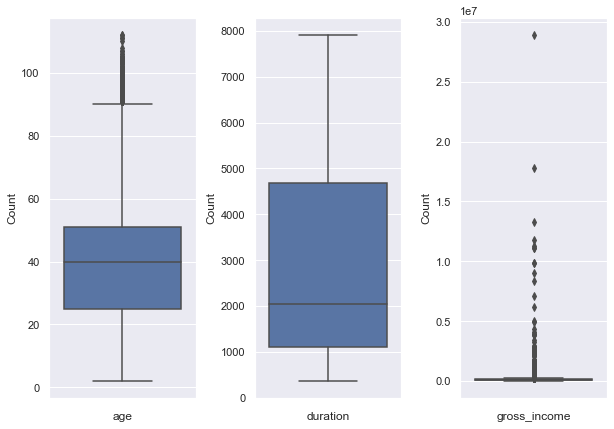

In [146]:
fig=plt.figure(figsize=(10,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for attr,i in zip(['age','duration','gross_income'],range(1,4)):
    sns.set(font_scale = 1)
    ax=fig.add_subplot(1,3,i)
    sns.boxplot(y=df[attr],ax=ax)
    plt.xlabel(attr)
    plt.ylabel('Count')
plt.show()

### Treating Gross Income Data

In [147]:
import numpy as np
log_gi=np.log(df.gross_income)

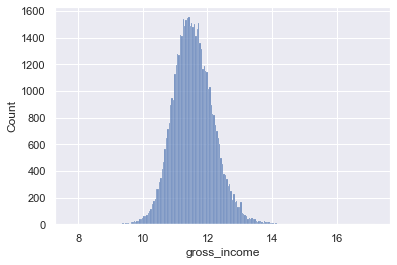

In [148]:
sns.histplot(log_gi);

In [149]:
df['log_gross_income']=np.log(df.gross_income)

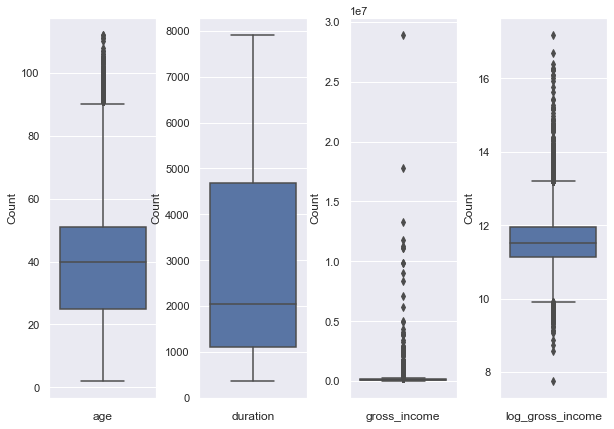

In [150]:
fig=plt.figure(figsize=(10,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for attr,i in zip(['age','duration','gross_income','log_gross_income'],range(1,5)):
    sns.set(font_scale = 1)
    ax=fig.add_subplot(1,4,i)
    sns.boxplot(y=df[attr],ax=ax)
    plt.xlabel(attr)
    plt.ylabel('Count')
plt.show()

## Treating Outliers

There are outliers in age and gross_income columns.

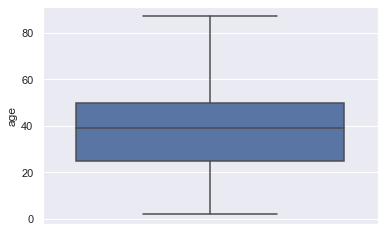

In [154]:
df_main=df.copy() ## saving the dataframe as df_main

### Removing outliers from age log(gross_income)
dfo=df.copy()
dfo=dfo[dfo['age']<=87]
sns.boxplot(y=dfo.age);

<AxesSubplot:ylabel='log_gross_income'>

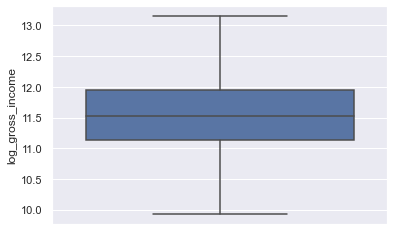

In [155]:
## removing outlier from log(gross income)
dfout=dfo.copy()
dfout=dfout[dfout['log_gross_income']<=13.15]
dfout=dfout[dfout['log_gross_income']>=9.93]
sns.boxplot(y=dfout.log_gross_income)

In [156]:
df=dfout

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52518 entries, 0 to 54029
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 52518 non-null  object 
 1   age                    52518 non-null  int32  
 2   gross_income           52518 non-null  float64
 3   segment                52518 non-null  object 
 4   num_credit_cards       52518 non-null  int32  
 5   tiprel_1mes            52518 non-null  object 
 6   ind_actividad_cliente  52518 non-null  int64  
 7   num_Products           52518 non-null  int32  
 8   num_loans              52518 non-null  int32  
 9   duration               52518 non-null  int32  
 10  activity               52518 non-null  object 
 11  log_gross_income       52518 non-null  float64
dtypes: float64(2), int32(5), int64(1), object(4)
memory usage: 4.2+ MB


In [160]:
len(df_main)-len(df) 

1512

>##### 1512 rows are removed as outliers

In [168]:
df.activity.value_counts()

I0    25774
A1    22356
I1     2374
A0     2014
Name: activity, dtype: int64

#### Percentage of number of removed rows for each of the four categories

In [179]:
round((df_main.activity.value_counts() - df.activity.value_counts())*100/df_main.activity.value_counts(),2)

I0    3.06
A1    2.40
I1    2.63
A0    4.00
Name: activity, dtype: float64

### Distribution of Numeric Data

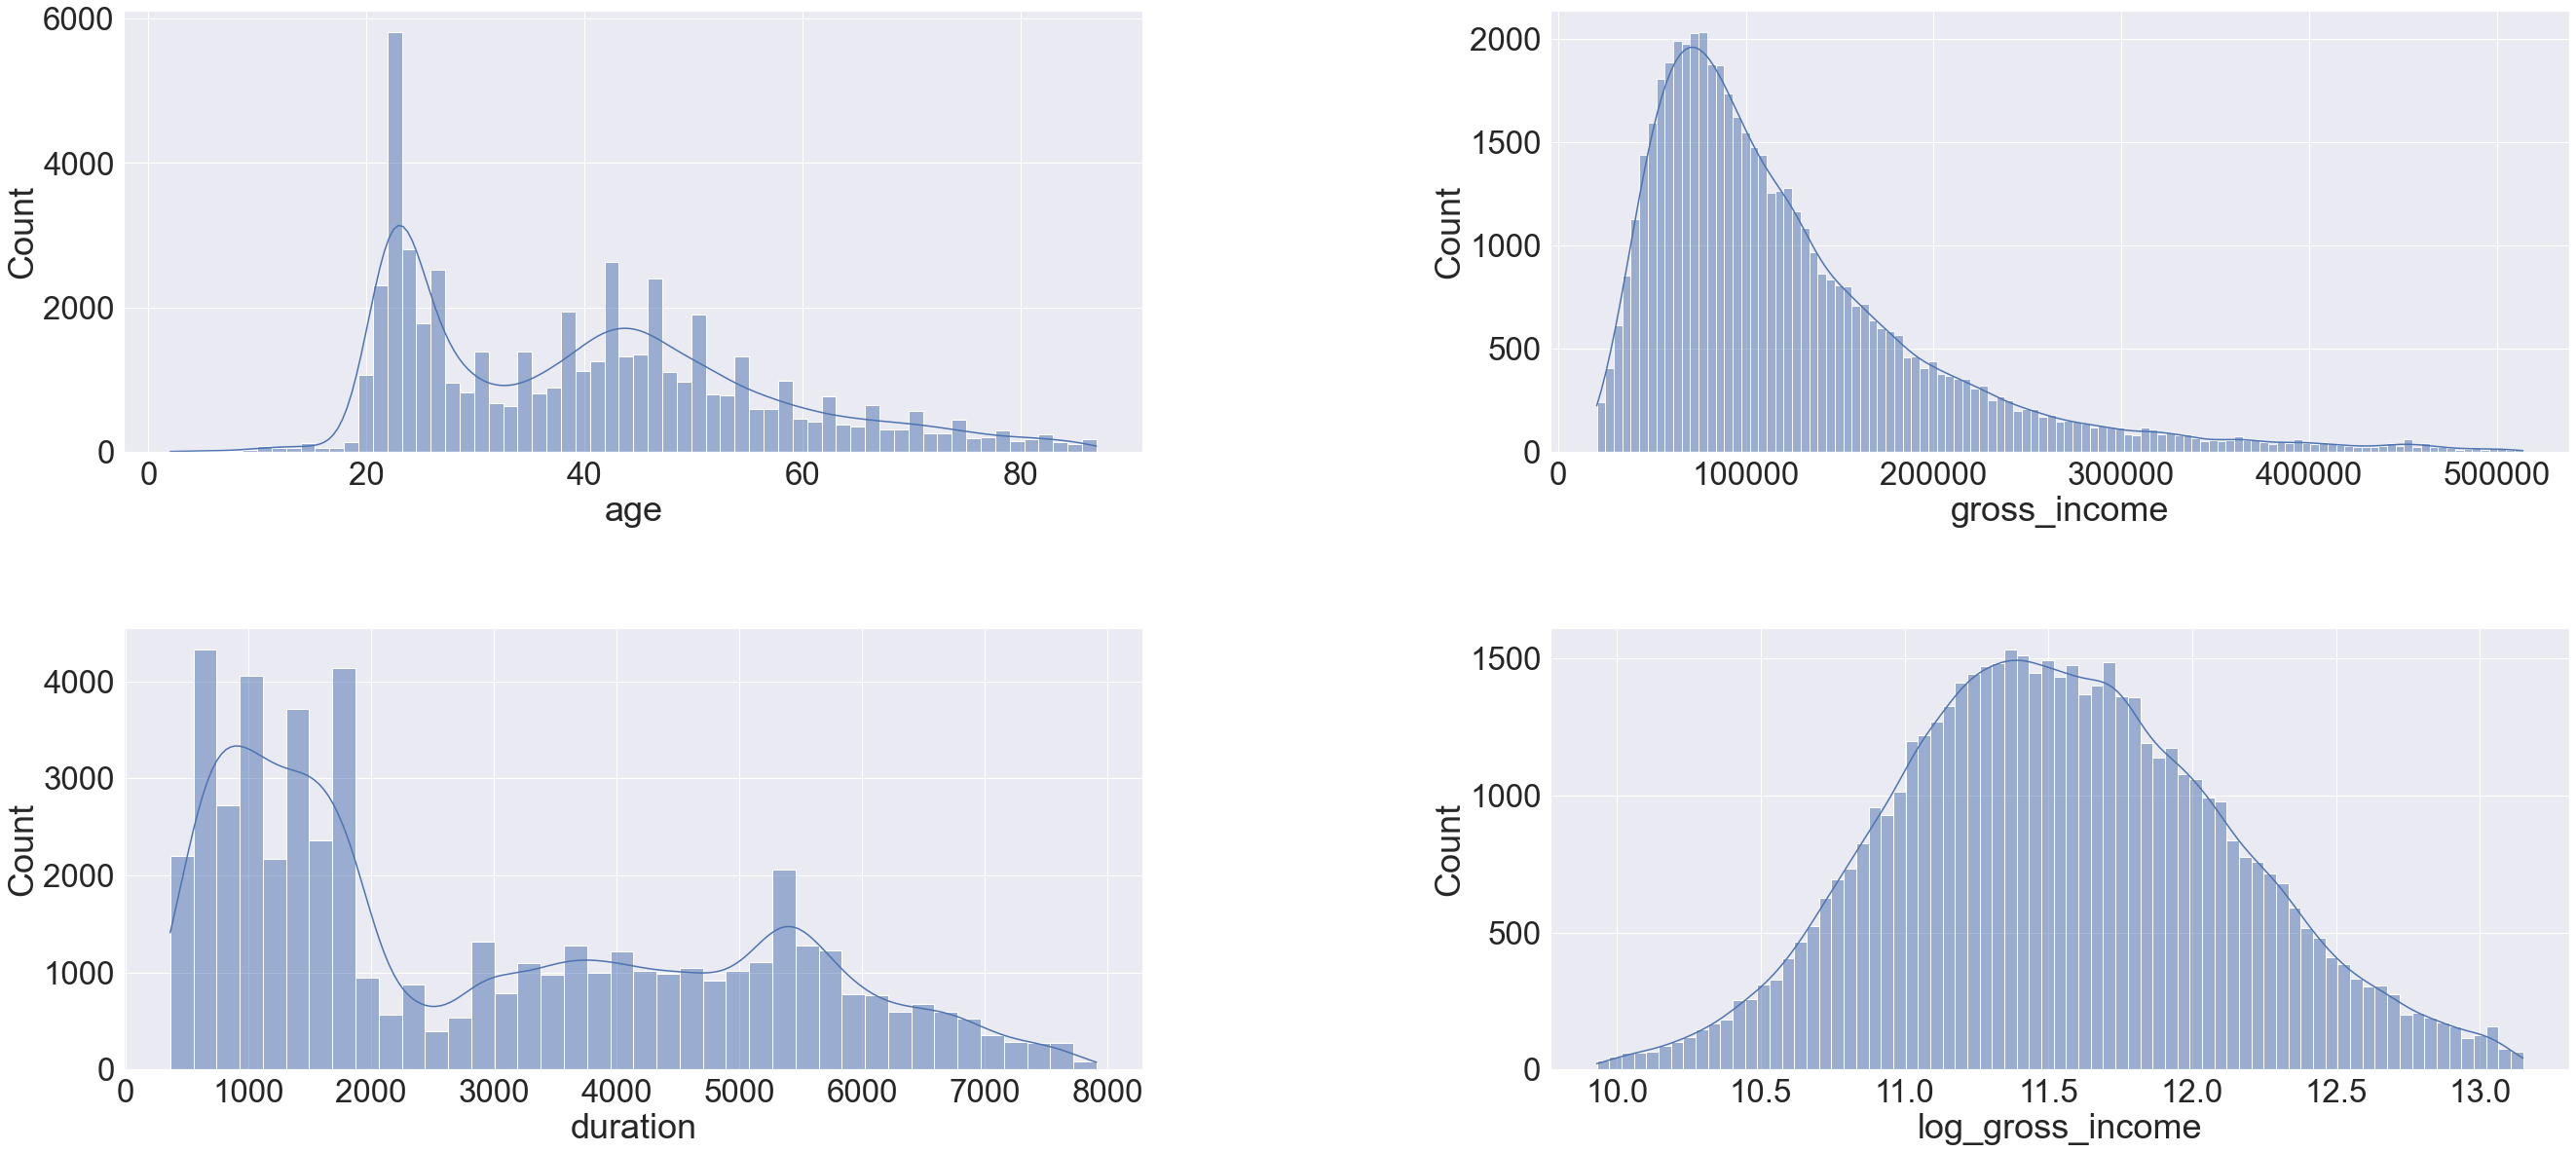

In [180]:
fig=plt.figure(figsize=(45,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for attr,i in zip(['age', 'gross_income', 'duration','log_gross_income'],range(1,5)):
    sns.set(font_scale = 3)
    ax=fig.add_subplot(2,2,i)
    sns.histplot(x=df[attr],ax=ax,kde = True)
    plt.xlabel(attr)
plt.show()

### Categorical Data 

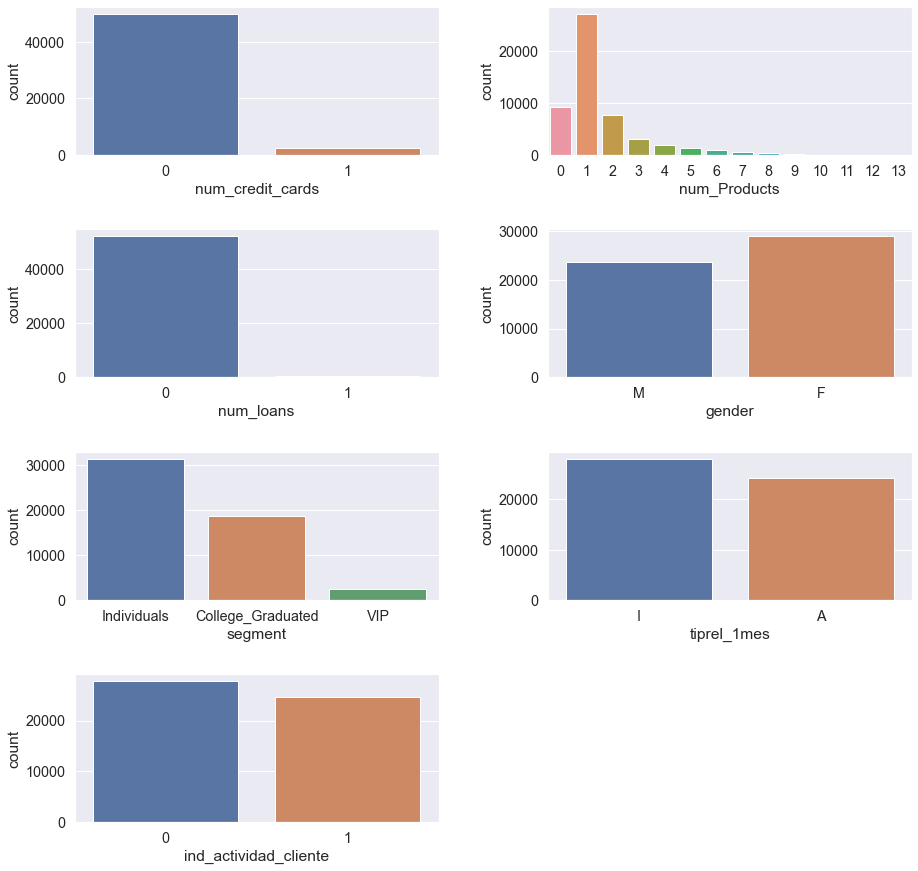

In [188]:

fig=plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for attr,i in zip(['num_credit_cards','num_Products', 'num_loans'],range(1,4)):
    sns.set(font_scale = 1.3)
    ax=fig.add_subplot(4,2,i)
    sns.countplot(x=attr,data=df)
    plt.xlabel(attr)
for attr,i in zip(cat_keys,range(4,8)):
    sns.set(font_scale = 1.3)
    ax=fig.add_subplot(4,2,i)
    sns.countplot(x=attr,data=df)
    plt.xlabel(attr)
plt.show()

### Correlation

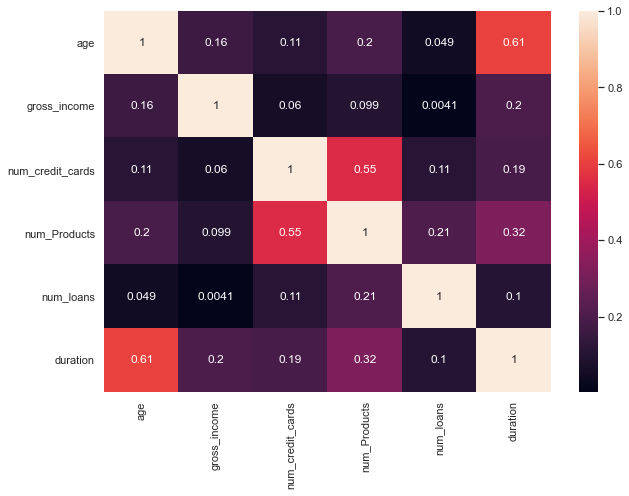

In [189]:
sns.set(font_scale=1)
plt.figure(figsize=(10, 7))
sns.heatmap(df[num_keys].corr(), annot=True);

#### Defining the four categories on activity

In [190]:
df.activity.value_counts()

I0    25774
A1    22356
I1     2374
A0     2014
Name: activity, dtype: int64

In [196]:
A1=df[df['activity']=='A1']
A0=df[df['activity']=='A0']
I1=df[df['activity']=='I1']
I0=df[df['activity']=='I0']

print(" No. of Customers active in the begining and active at the end :", len(A1),"\n",
      "No. of Customers active in the begining and inactive at the end :",len(A0),"\n",
      "No. of Customers inactive in the begining and active at the end :",len(I1),"\n",
      "No. of Customers inactive in the begining and inactive at the end :",len(I0),"\n")

 No. of Customers active in the begining and active at the end : 22356 
 No. of Customers active in the begining and inactive at the end : 2014 
 No. of Customers inactive in the begining and active at the end : 2374 
 No. of Customers inactive in the begining and inactive at the end : 25774 



###   For people who were inactive at the start of the study and were active by the time the study ended, is there a pattern in terms of age and gender?

In [245]:
q1=df[['age','gender','activity']].copy() # creating a dataframe of for age gender and activity


## refering to inactive to active shift of customers as 1 and the rest as 0 under the variable name 'gained' 

gained=[]  

for i in range(0,len(q1)):
    if q1.activity.iloc[i]=='I1':
        gained.append("Gained")
    else:
        gained.append("Others")

q1['gained']=gained

## dropping activity

q1.drop(axis=1,labels=['activity'],inplace=True)

## creating dummy variable for gender
#q1=pd.get_dummies(data=q1, columns=['gender'],drop_first=True)
q1.keys()

Index(['age', 'gender', 'gained'], dtype='object')

In [250]:
gained=q1[q1.gained=="Gained"]
gained.describe().T

count       mean        std  min   25%   50%   75%   max
age  2374.0  39.076243  16.654988  2.0  24.0  37.0  49.0  87.0

In [251]:
others=q1[q1.gained=="Others"]
others.describe().T

count       mean        std  min   25%   50%   75%   max
age  50144.0  40.164945  16.259224  2.0  25.0  39.0  50.0  87.0

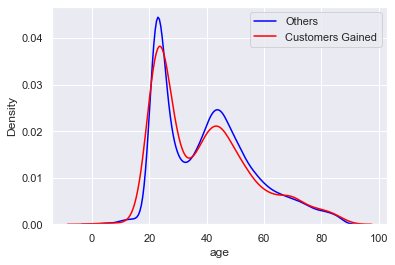

In [223]:
sns.kdeplot(others['age'],color='blue')
sns.kdeplot(gained['age'],color='red')
plt.legend(['Others','Customers Gained'])
plt.show()

(36.0, 42.0)

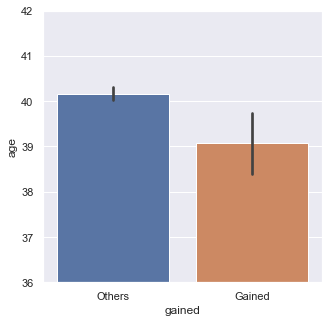

In [224]:
fig=plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax=fig.add_subplot(1,1,1)
sns.set(font_scale = 1)
sns.barplot(x='gained',y='age',data=q1)
ax.set_ylim(36,42)

#### Performing the two-sample Kolmogorov-Smirnov test for goodness of fit for age

In [225]:
ks_2samp(others.age,gained.age,alternative ='two-sided',mode='asymp')

KstestResult(statistic=0.056014650846841596, pvalue=1.2670298679900432e-06)

#### Performing z-test

In [226]:
ztest(x1=others.age,x2=gained.age,value=0,alternative='two-sided')

(3.1843598412106595, 0.0014507454666051983)

> <span style="color:red">**From the graphs and statistical tests it seems that age is a distinguishing factor for the people who were inactive at the start and active by the time the study ended from the rest.**</span>


#### Checking for Gender

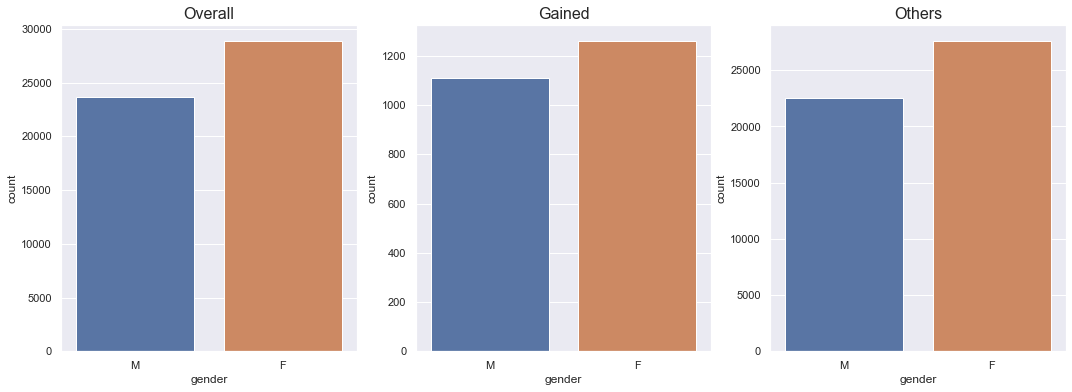

In [228]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
ax[0].set_title('Overall', fontsize=16)
sns.countplot(data=q1,x='gender',ax=ax[0])
ax[1].set_title('Gained', fontsize=16)
sns.countplot(data=gained,x='gender',ax=ax[1])
ax[2].set_title('Others', fontsize=16)
sns.countplot(data=others,x='gender',ax=ax[2])

plt.show()

In [231]:
print('The percentage of males amoung the customers who turned from inactive to active = ',round(100*gained[gained['gender']=="M"].gender.count()/len(gained),3),"%")
print('The percentage of males among the rest of the customers = ',round(100*others[others['gender']=="M"].gender.count()/len(others),3),"%")
print('The percentage of males in all customers = ',round(100*df[df['gender']=='M'].gender.count()/len(df),3),"%")

The percentage of males amoung the customers who turned from inactive to active =  46.841 %
The percentage of males among the rest of the customers =  44.899 %
The percentage of males in all customers =  44.986 %


In [246]:
## creating dummy variable for gender
q1d=q1.copy()
q1d=pd.get_dummies(data=q1d, columns=['gender'],drop_first=True)
q1d.keys()

Index(['age', 'gained', 'gender_M'], dtype='object')

(0.4, 0.5)

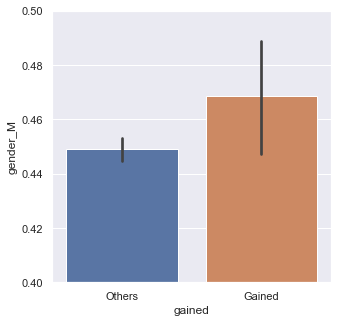

In [235]:
fig=plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax=fig.add_subplot(1,1,1)
sns.set(font_scale = 1)
sns.barplot(x='gained',y='gender_M',data=q1d)
ax.set_ylim(0.4,0.5)

In [244]:
ztest(x1=q1d[q1d.gained=='Gained'].gender_M,x2=q1d[q1d['gained']=='Others'].gender_M,value=0,alternative='two-sided')

(1.858634087697627, 0.06307902194233478)

> <span style="color:red">**As the difference between the two percentages is small, there is may not be enough depedency on gender for the poeple who shift from being inactive to active**</span>

#### Looking for gender and age combined

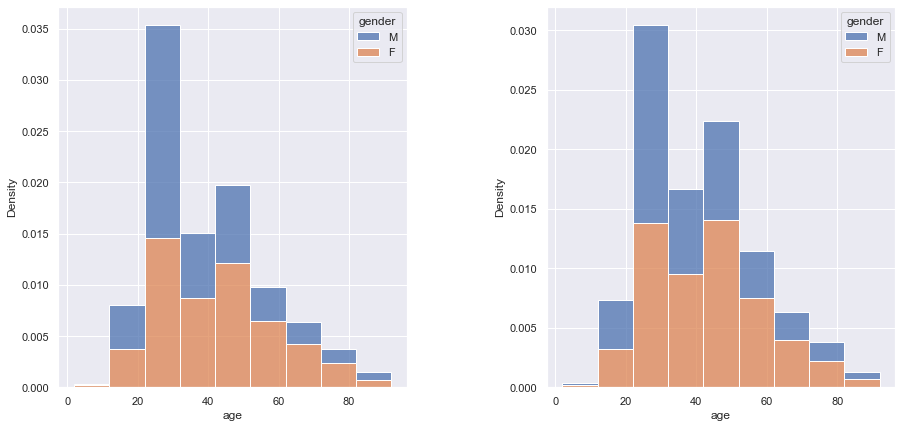

In [284]:
fig=plt.figure(figsize=(15,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.add_subplot(1,2,1)
plots=sns.histplot(data=gained, x="age", binwidth=10 ,hue='gender',stat='density',multiple='stack')


fig.add_subplot(1,2,2)
plots2=sns.histplot(data=others, x="age", binwidth=10,hue='gender',stat='density',multiple='stack')

plt.show()


> - <span style="color:red"> **The two groups have different densities for different age groups between 20 and 60 years.**</span>
> - <span style="color:red">**The ratio of Males to Females is also slighlty different for ages between 20 adn 60 years.**</span>

###  Do people with more than average annual income tend to have relatively high activity rates compared to people with less than average annual income?

In [94]:
print('No. of customers with zero products bought=',
      len(df[df['num_Products']==0]))
print('No. of customers with zero products who also have zero loans=',
      df[df['num_Products']==0].num_loans.value_counts()[0])
print('No. of customers with zero products who also have zero credits cards=',
      df[df['num_Products']==0].num_credit_cards.value_counts()[0])

No. of customers with zero products bought= 9573
No. of customers with zero products who also have zero loans= 9573
No. of customers with zero products who also have zero credits cards= 9573


#### checking if no. of credit cards + no. of loans is greater than no. of products for any customer


In [95]:
d=pd.DataFrame()
d['card_and_loan']=df.num_credit_cards+df.num_loans
d['num_Products']=df.num_Products
d['differ']=d.num_Products-d.card_and_loan
for i in range(0,len(d)):
    if d.differ.iloc[i] <0:
        print('False')

Hence, we can assume that the **no. of credit cards** and **no. of loans** are included in the **number of products**

#### So activity rate can be defined as num_Products/duration assuming these products are sold to the customer over that duration and not just during the study period

In [287]:
df['activity_rate']=df.num_Products*30/df.duration   ## number of products per month

In [288]:
below_average=df[df['gross_income']<=df.gross_income.mean()] ## customers with below average gross income
above_average=df[df['gross_income']>df.gross_income.mean()] ## customers with above average gross income

In [293]:
ar=pd.DataFrame(data=list(df.activity_rate.describe()),columns=['Overall'],
                index=list(below_average.activity_rate.describe().keys()))
ar['Below_average_Gross_income']=list(below_average.activity_rate.describe())
ar['Above-average_Gross_income']=list(above_average.activity_rate.describe())
print('Description of the Activity Rate')
ar.T

Description of the Activity Rate


count      mean       std  min       25%  \
Overall                     52518.0  0.023730  0.027158  0.0  0.006774   
Below_average_Gross_income  32879.0  0.025083  0.028096  0.0  0.007407   
Above-average_Gross_income  19639.0  0.021466  0.025349  0.0  0.006076   

                                 50%       75%       max  
Overall                     0.017045  0.029797  0.392670  
Below_average_Gross_income  0.018884  0.032733  0.392670  
Above-average_Gross_income  0.015915  0.027909  0.371287

In [294]:
np=pd.DataFrame(data=list(df.num_Products.describe()),columns=['Overall'],
                index=list(below_average.num_Products.describe().keys()))
np['Below_average_Gross_income']=list(below_average.num_Products.describe())
np['Above-average_Gross_income']=list(above_average.num_Products.describe())
print('Description of the num_Products')
np.T

Description of the num_Products


count      mean       std  min  25%  50%  75%  \
Overall                     52518.0  1.539263  1.579958  0.0  1.0  1.0  2.0   
Below_average_Gross_income  32879.0  1.410262  1.424425  0.0  1.0  1.0  2.0   
Above-average_Gross_income  19639.0  1.755232  1.790032  0.0  1.0  1.0  2.0   

                             max  
Overall                     13.0  
Below_average_Gross_income  12.0  
Above-average_Gross_income  13.0

In [376]:
below_average.describe().T

count          mean           std           min  \
age                    32879.0     38.175979     15.637998      2.000000   
gross_income           32879.0  76423.277370  24816.884162  20544.420000   
num_credit_cards       32879.0      0.039752      0.195379      0.000000   
ind_actividad_cliente  32879.0      0.439156      0.496292      0.000000   
num_Products           32879.0      1.410262      1.424425      0.000000   
num_loans              32879.0      0.009276      0.095868      0.000000   
duration               32879.0   2578.076341   1909.829250    366.000000   
log_gross_income       32879.0     11.183599      0.363310      9.930345   
activity_rate          32879.0      0.025083      0.028096      0.000000   

                                25%           50%           75%           max  
age                       24.000000     36.000000     48.000000      87.00000  
gross_income           57111.675000  75884.010000  96171.720000  122848.86000  
num_credit_cards           0.000000      0.000000      0.000000       1.00000  
ind_actividad_cliente      0.000000      0.000000      1.000000       1.00000  
num_Products               1.000000      1.000000      2.000000      12.00000  
num_loans                  0.000000      0.000000      0.000000       1.00000  
duration                1063.000000   1770.000000   4060.000000    7909.00000  
log_gross_income          10.952764     11.236961     11.473891      11.71871  
activity_rate              0.007407      0.018884      0.032733       0.39267

In [375]:
above_average.describe().T

count           mean           std            min  \
age                    19639.0      43.363206     16.804820       2.000000   
gross_income           19639.0  200586.866387  76976.753347  122854.080000   
num_credit_cards       19639.0       0.068079      0.251888       0.000000   
ind_actividad_cliente  19639.0       0.524008      0.499436       0.000000   
num_Products           19639.0       1.755232      1.790032       0.000000   
num_loans              19639.0       0.009878      0.098900       0.000000   
duration               19639.0    3409.269006   2092.447710     366.000000   
log_gross_income       19639.0      12.149134      0.331011      11.718753   
activity_rate          19639.0       0.021466      0.025349       0.000000   

                                 25%            50%            75%  \
age                        27.000000      43.000000      54.000000   
gross_income           144596.520000  175563.330000  229511.085000   
num_credit_cards            0.000000       0.000000       0.000000   
ind_actividad_cliente       0.000000       1.000000       1.000000   
num_Products                1.000000       1.000000       2.000000   
num_loans                   0.000000       0.000000       0.000000   
duration                 1439.000000    3344.000000    5295.000000   
log_gross_income           11.881703      12.075755      12.343707   
activity_rate               0.006076       0.015915       0.027909   

                                 max  
age                        87.000000  
gross_income           513969.150000  
num_credit_cards            1.000000  
ind_actividad_cliente       1.000000  
num_Products               13.000000  
num_loans                   1.000000  
duration                 7884.000000  
log_gross_income           13.149919  
activity_rate               0.371287

Above average Income


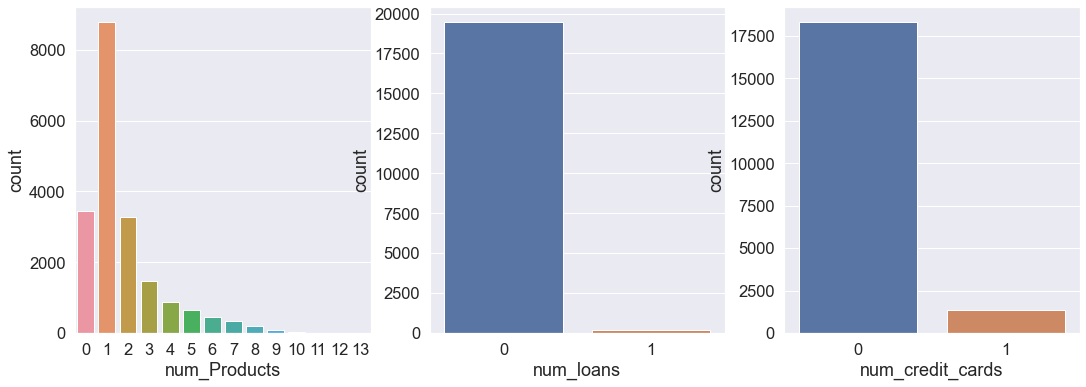

In [370]:


f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
#ax[0].set_title('Overall', fontsize=16)
sns.countplot(data=above_average,x='num_Products',ax=ax[0])
#ax[1].set_title('Gained', fontsize=16)
sns.countplot(data=above_average,x='num_loans',ax=ax[1])
#ax[2].set_title('Others', fontsize=16)
sns.countplot(data=above_average,x='num_credit_cards',ax=ax[2])
print('Above average Income')
plt.show()

Below Average Income


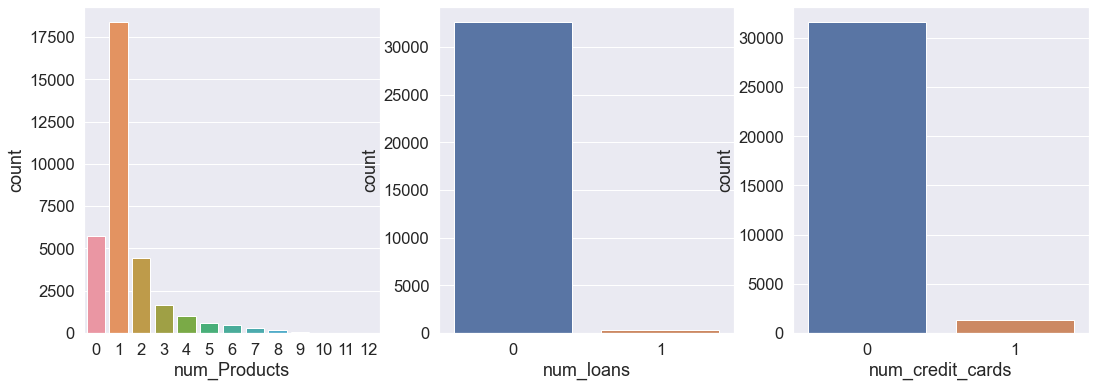

In [371]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
#ax[0].set_title('Overall', fontsize=16)
sns.countplot(data=below_average,x='num_Products',ax=ax[0])
#ax[1].set_title('Gained', fontsize=16)
sns.countplot(data=below_average,x='num_loans',ax=ax[1])
#ax[2].set_title('Others', fontsize=16)
sns.countplot(data=below_average,x='num_credit_cards',ax=ax[2])
print('Below Average Income')
plt.show()

In [381]:
above_average[above_average.num_Products>0].num_Products.count()/len(above_average)

0.8238199500992922

In [383]:
below_average[below_average.num_Products>0].num_Products.count()/len(below_average)

0.8248730192524103

> **Even though above-average income customers, on average, buy a higher nuber of products, more of the above average earning customers do not buy a product as compared to below-average earning customers.**

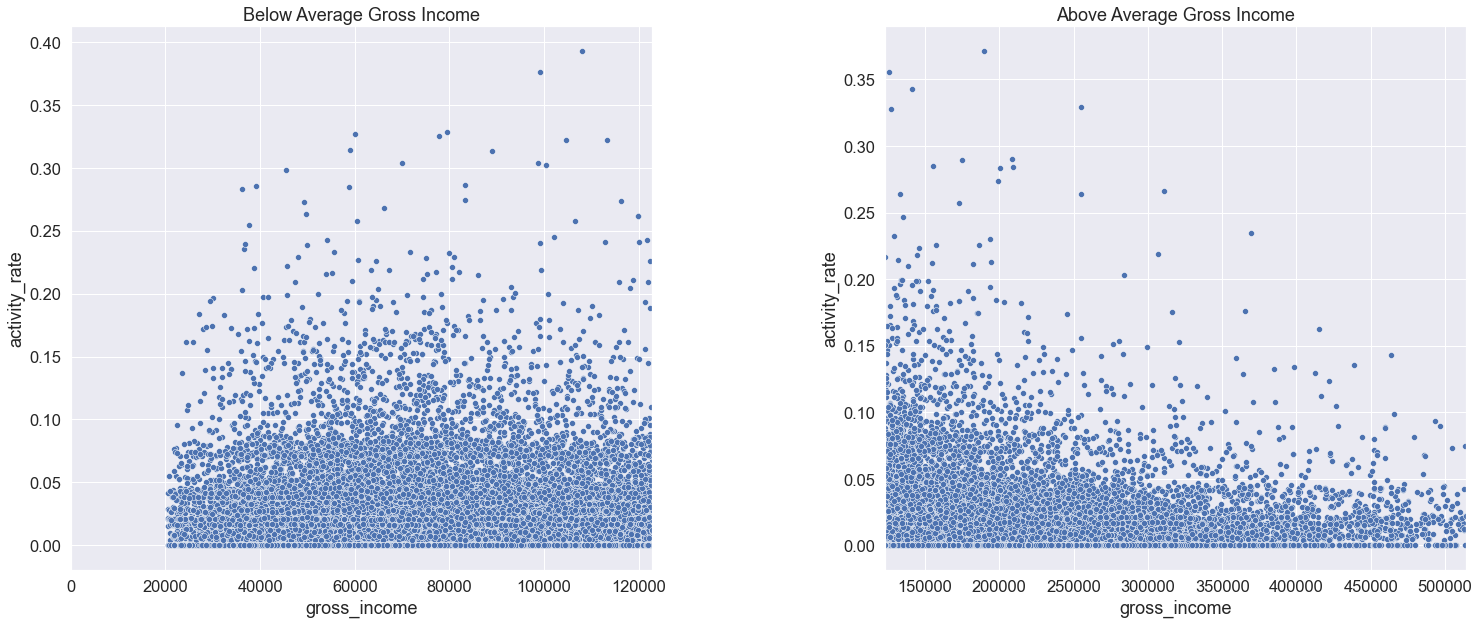

In [377]:
### plotting activity rates vs gross_income
fig=plt.figure(figsize=(25,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
sns.set(font_scale = 1.5)

ax=fig.add_subplot(1,2,1)
sns.scatterplot(x='gross_income',y='activity_rate',data=below_average)
ax.set_xlim(0,df.gross_income.mean())
ax.set_title('Below Average Gross Income')

ax=fig.add_subplot(1,2,2)
sns.scatterplot(x='gross_income',y='activity_rate',data=above_average)
ax.set_xlim(df.gross_income.mean(),df.gross_income.max())
ax.set_title('Above Average Gross Income')



plt.show()

excluding zero activity rate


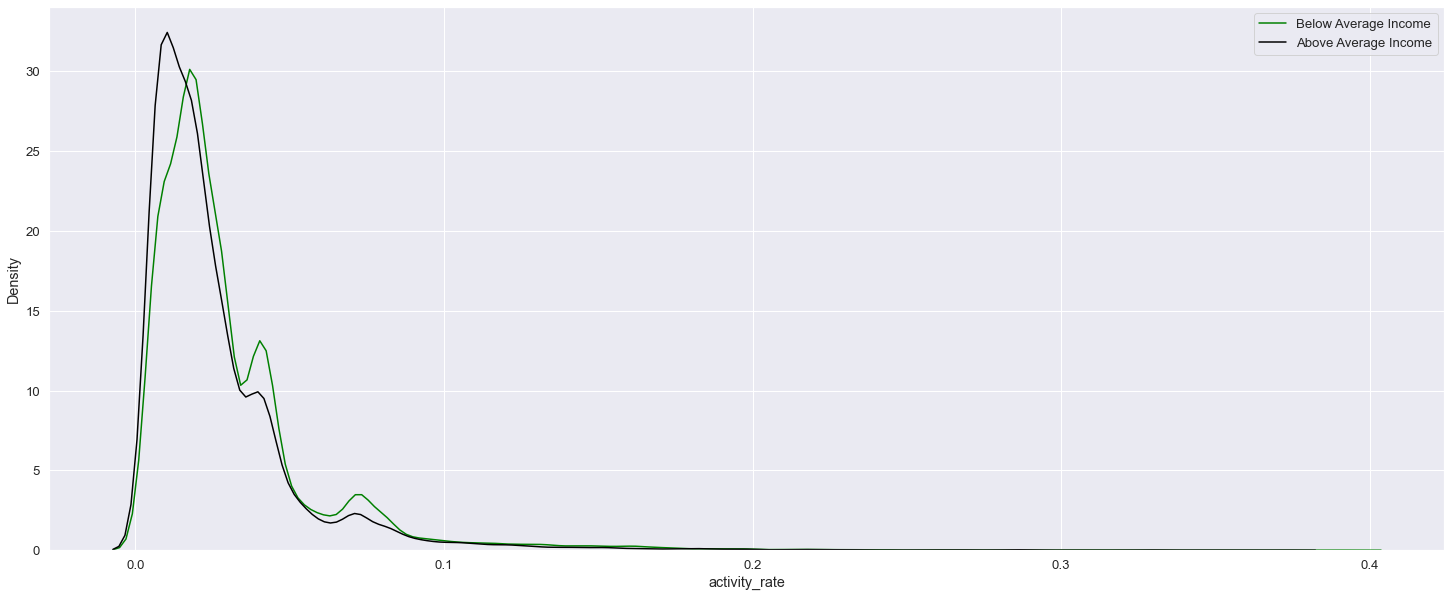

In [295]:
## plotting distribution of activity rates excluding zero activity rate
print('excluding zero activity rate')

fig=plt.figure(figsize=(25,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
sns.set(font_scale = 1.2)


sns.kdeplot(below_average[below_average['activity_rate']>0].activity_rate,color='green')
sns.kdeplot(above_average[above_average['activity_rate']>0].activity_rate,color='black')
plt.legend(['Below Average Income','Above Average Income'])
plt.show()



### (Q3) What is the relationship between the number of products owned by customers who were active at the start and at the end vs those who were active at the start but were inactive at the end of the study period?

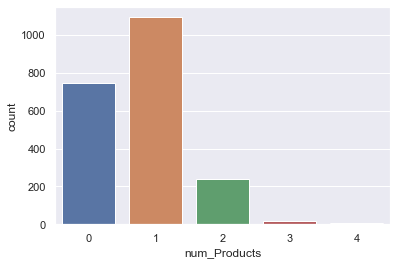

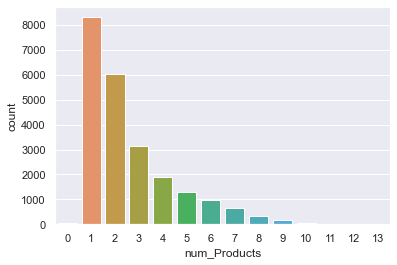

In [102]:
sns.countplot(x=A0.num_Products)
plt.show()
sns.countplot(x=A1.num_Products);

Num of Products - Active to Inactive


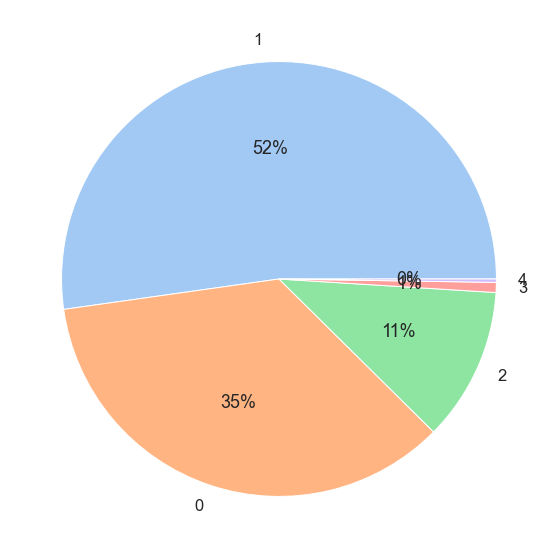

In [384]:
labels=A0.num_Products.value_counts().keys()
data=A0.num_Products.value_counts().values
colors = sns.color_palette('pastel')[0:5]
fig=plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
print("Num of Products - Active to Inactive")
plt.show()

Number of Products - active throughout


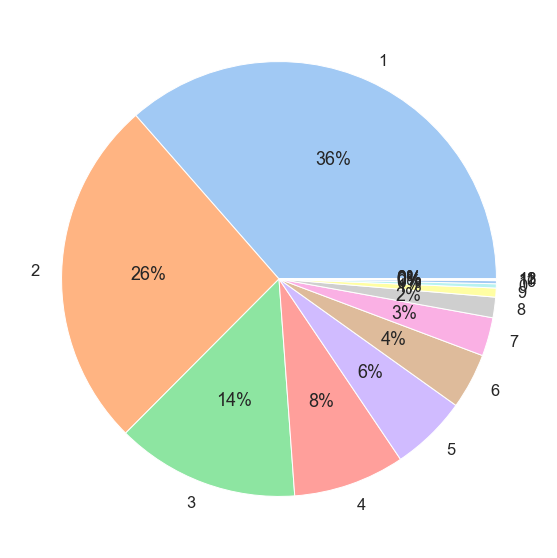

In [385]:
labels=A1.num_Products.value_counts().keys()
data=A1.num_Products.value_counts().values
colors = sns.color_palette('pastel')[0:14]
fig=plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
print('Number of Products - active throughout')
plt.show()

In [69]:
np=pd.DataFrame()
np['A0'] =A0.num_Products.describe()
np['A1']=A1.num_Products.describe()
np

A0            A1
count  2014.000000  22356.000000
mean      0.783019      2.579173
std       0.687761      1.879802
min       0.000000      0.000000
25%       0.000000      1.000000
50%       1.000000      2.000000
75%       1.000000      3.000000
max       4.000000     13.000000

>- <span style="color:red"> **The customers who shifted from being active to inactive bught products between 0 and 4, concetrated at 0 and 1 (87%)**
>- <span style="color:red"> **The customers who were active throughout bought products between 1 and 13. They are highly concentrated at 1 and 2 (62.8%)**</span>


### How people who display consistent behaviour (active at start and active at end, inactive at start and inactive at end) differ from people who display a change in their behaviour (active at start but inactive at the end or inactive at start but active at end)?

In [297]:
consistent=pd.concat([A1,I0])
inconsistent = pd.concat([A0,I1])

In [298]:
consistent.describe().T

count           mean           std           min  \
age                    48130.0      40.026678     16.198931      2.000000   
gross_income           48130.0  122938.341502  78775.352252  20544.420000   
num_credit_cards       48130.0       0.054561      0.227123      0.000000   
ind_actividad_cliente  48130.0       0.464492      0.498743      0.000000   
num_Products           48130.0       1.583960      1.631219      0.000000   
num_loans              48130.0       0.009848      0.098750      0.000000   
duration               48130.0    2880.942427   2010.472496    366.000000   
log_gross_income       48130.0      11.545591      0.584410      9.930345   

                                25%            50%            75%  \
age                       25.000000      39.000000      50.000000   
gross_income           68579.017500  100814.985000  153749.707500   
num_credit_cards           0.000000       0.000000       0.000000   
ind_actividad_cliente      0.000000       0.000000       1.000000   
num_Products               1.000000       1.000000       2.000000   
num_loans                  0.000000       0.000000       0.000000   
duration                1117.000000    1927.000000    4615.000000   
log_gross_income          11.135742      11.521042      11.943081   

                                 max  
age                        87.000000  
gross_income           513969.150000  
num_credit_cards            1.000000  
ind_actividad_cliente       1.000000  
num_Products               13.000000  
num_loans                   1.000000  
duration                 7909.000000  
log_gross_income           13.149919

In [299]:
inconsistent.describe().T

count           mean           std           min  \
age                    4388.0      41.092525     17.101158      2.000000   
gross_income           4388.0  121928.903635  79157.485555  21606.330000   
num_credit_cards       4388.0       0.004102      0.063923      0.000000   
ind_actividad_cliente  4388.0       0.541021      0.498371      0.000000   
num_Products           4388.0       1.048997      0.654710      0.000000   
num_loans              4388.0       0.005697      0.075274      0.000000   
duration               4388.0    2976.172972   2125.700866    366.000000   
log_gross_income       4388.0      11.534433      0.587719      9.980742   

                               25%           50%            75%            max  
age                       24.00000     40.000000      52.000000      87.000000  
gross_income           67601.77500  99765.855000  150653.947500  513830.490000  
num_credit_cards           0.00000      0.000000       0.000000       1.000000  
ind_actividad_cliente      0.00000      1.000000       1.000000       1.000000  
num_Products               1.00000      1.000000       1.000000       4.000000  
num_loans                  0.00000      0.000000       0.000000       1.000000  
duration                1067.00000   2164.000000    4986.500000    7879.000000  
log_gross_income          11.12139     11.510581      11.922741      13.149649

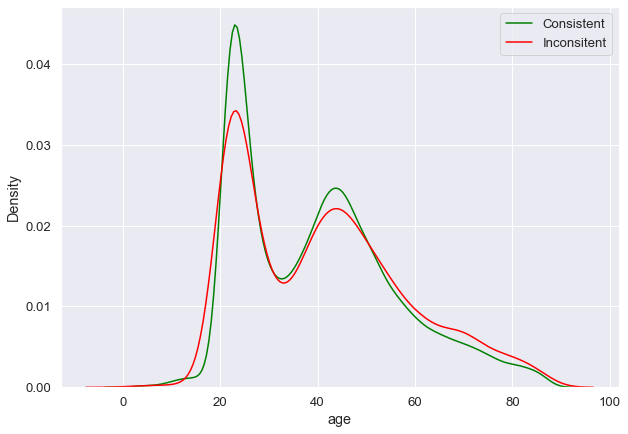

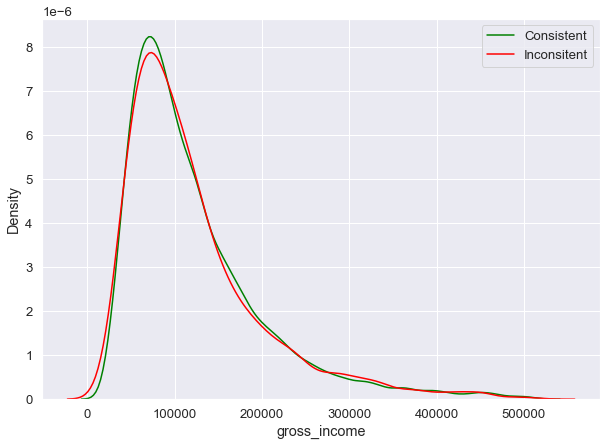

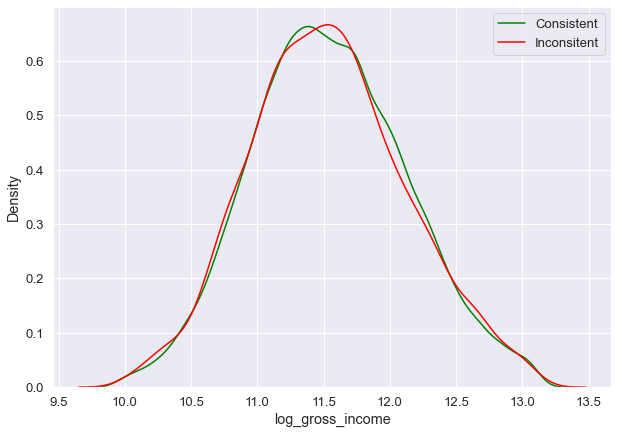

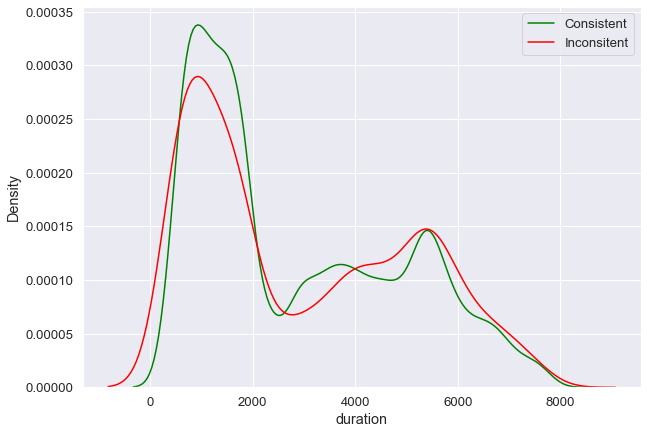

In [301]:
for attr in ['age','gross_income','log_gross_income','duration']:
    fig=plt.figure(figsize=(10,7))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    sns.set(font_scale = 1.2)
    
    #ax=fig.add_subplot(1,2,1)
    #ax.set_title('Consistent')
    sns.kdeplot(x=attr,data=consistent,color='green')
    
    #ax=fig.add_subplot(1,2,2)
    #ax.set_title('Inconsistent')
    sns.kdeplot(x=attr,data=inconsistent,color='red')
    plt.legend(['Consistent','Inconsitent'])
    plt.show()

In [303]:
for attr in ['age','gross_income','log_gross_income','duration']:
    print(attr,ks_2samp(consistent[attr],inconsistent[attr]))

age KstestResult(statistic=0.03571844978494698, pvalue=6.820022298406222e-05)
gross_income KstestResult(statistic=0.016368224466515313, pvalue=0.22903391607700196)
log_gross_income KstestResult(statistic=0.016368224466515313, pvalue=0.22903391607700196)
duration KstestResult(statistic=0.049703988419392164, pvalue=4.507656728242241e-09)


In [304]:
import scipy.stats as stats
for attr in ['age','gross_income','log_gross_income','duration']:
    print(attr,ztest(consistent[attr],inconsistent[attr], value=0, alternative='two-sided'))
    

age (-4.152682697454969, 3.28600222167664e-05)
gross_income (0.8122693114900571, 0.4166371157542026)
log_gross_income (1.2101066827750104, 0.22623795918263878)
duration (-2.989075200795129, 0.002798232515788281)


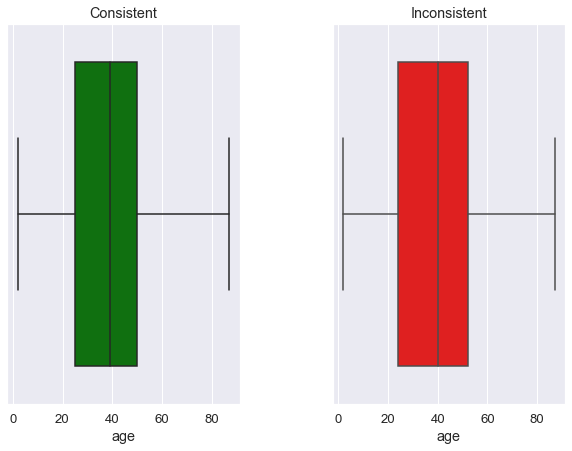

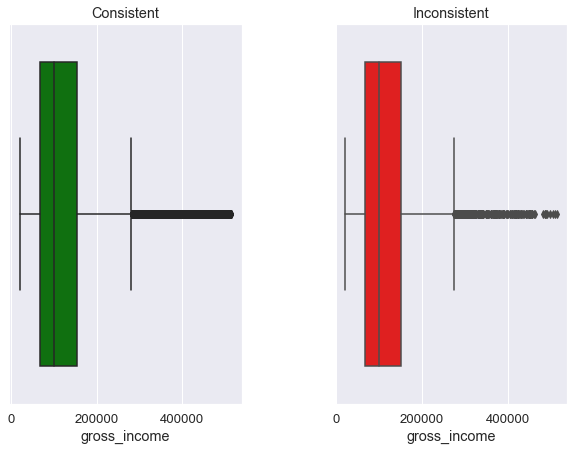

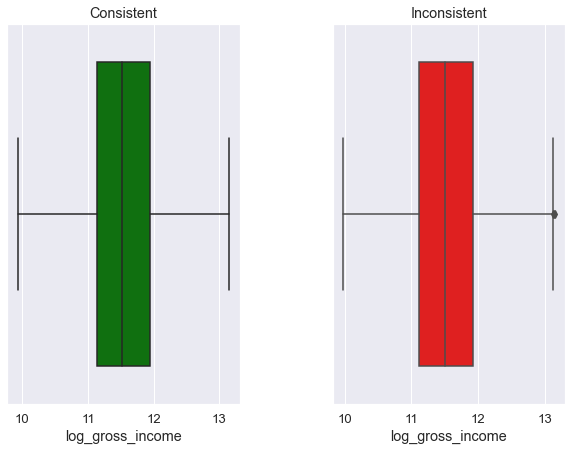

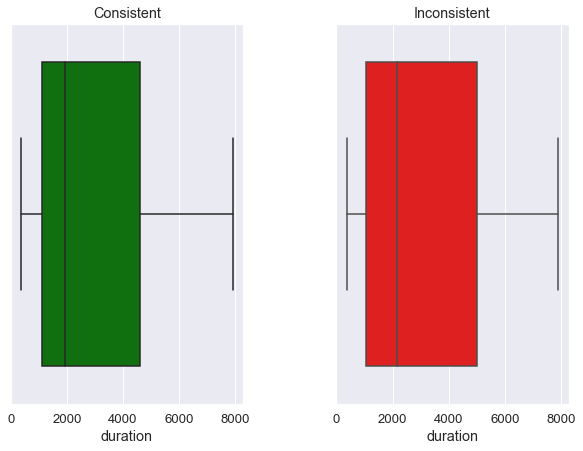

In [305]:
for attr in ['age','gross_income','log_gross_income','duration']:
    fig=plt.figure(figsize=(10,7))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    sns.set(font_scale = 1.2)
    
    ax=fig.add_subplot(1,2,1)
    ax.set_title('Consistent')
    sns.boxplot(x=attr,data=consistent,color='green',ax=ax)
    
    ax=fig.add_subplot(1,2,2)
    ax.set_title('Inconsistent')
    sns.boxplot(x=attr,data=inconsistent,color='red',ax=ax)
    plt.show()

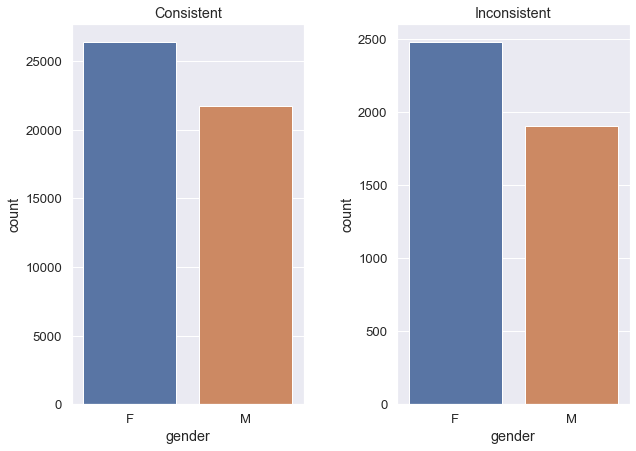

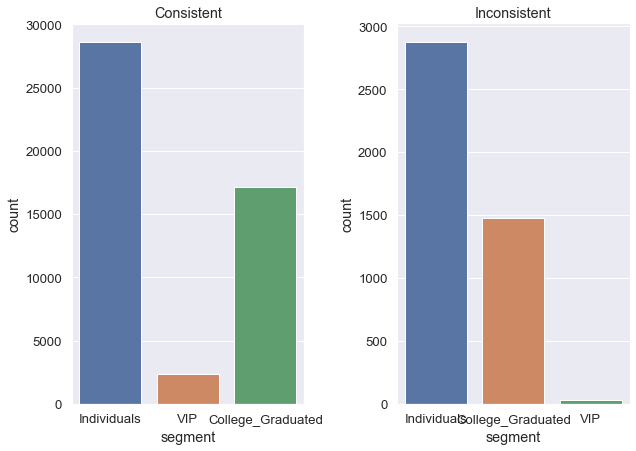

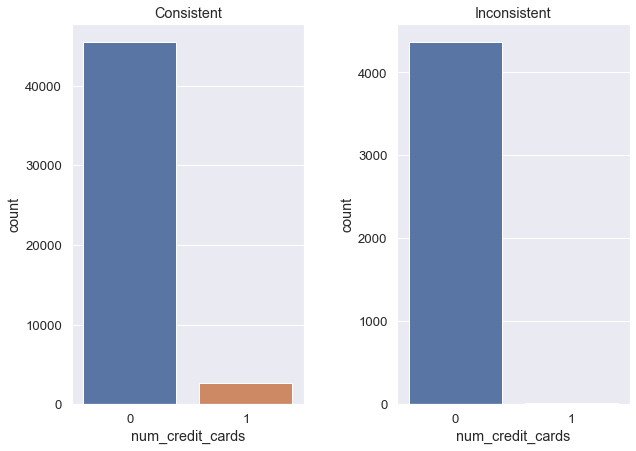

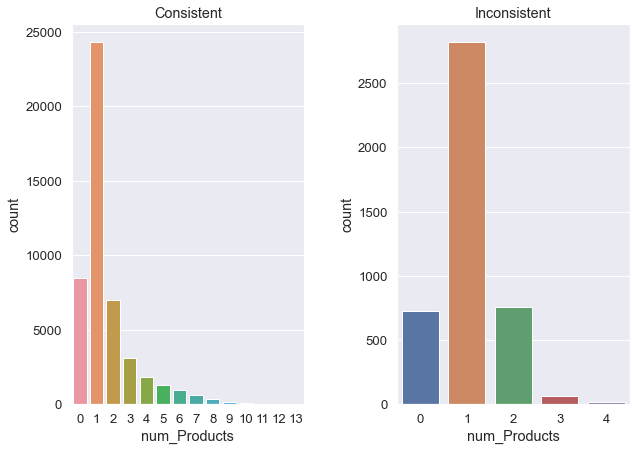

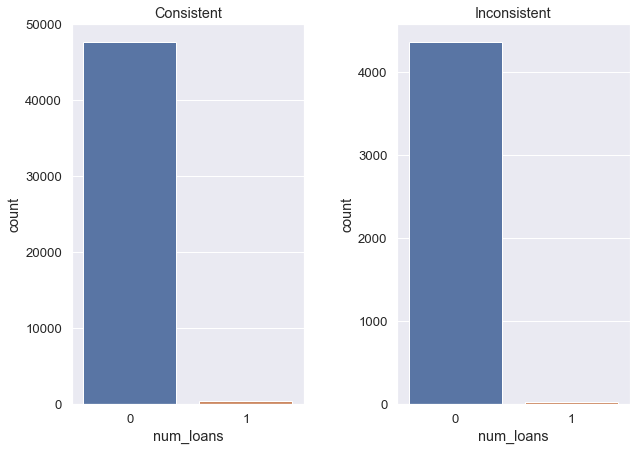

In [306]:
for attr in ['gender', 'segment','num_credit_cards','num_Products','num_loans',]:
    fig=plt.figure(figsize=(10,7))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    sns.set(font_scale = 1.2)
    
    ax=fig.add_subplot(1,2,1)
    ax.set_title('Consistent')
    sns.countplot(x=attr,data=consistent,ax=ax)
    
    
    ax=fig.add_subplot(1,2,2)
    ax.set_title('Inconsistent')
    sns.countplot(x=attr,data=inconsistent,ax=ax)
    plt.show()

Consistent - Gender


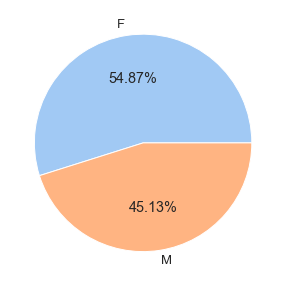

Inconsistent - Gender


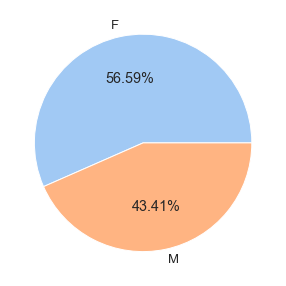

In [311]:
labels=consistent.gender.value_counts().keys()
data=consistent.gender.value_counts().values
colors = sns.color_palette('pastel')[0:2]
fig=plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
print('Consistent - Gender')
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

labels=inconsistent.gender.value_counts().keys()
data=inconsistent.gender.value_counts().values
colors = sns.color_palette('pastel')[0:2]
fig=plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
print('Inconsistent - Gender')
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

Females


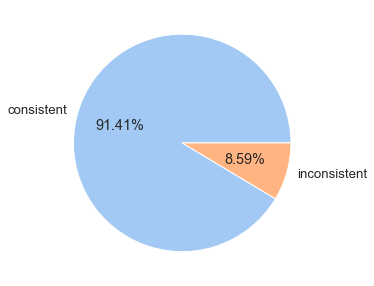

Males


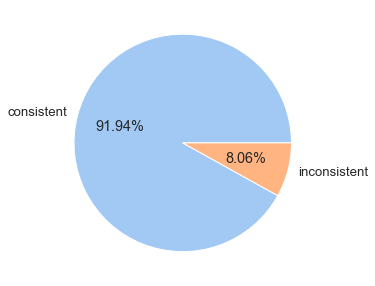

In [320]:
labels=['consistent','inconsistent']
data=[consistent.gender.value_counts().values[0],inconsistent.gender.value_counts().values[0]]
colors = sns.color_palette('pastel')[0:2]
fig=plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
print('Females')
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

labels=['consistent','inconsistent']
data=[consistent.gender.value_counts().values[1],inconsistent.gender.value_counts().values[1]]
colors = sns.color_palette('pastel')[0:2]
fig=plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
print('Males')
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

VIP


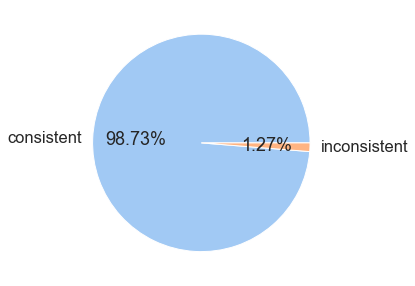

Individual


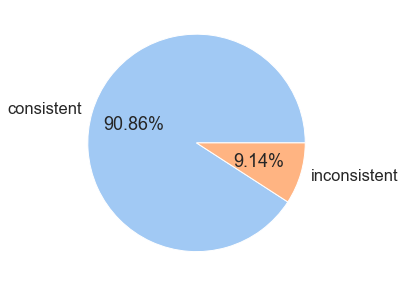

College Gratauted


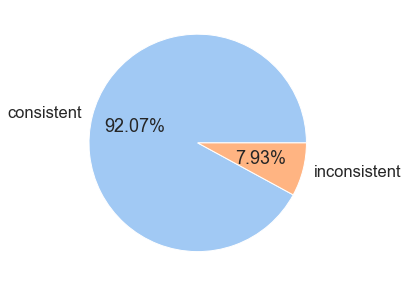

In [359]:
labels=['consistent','inconsistent']
data=[consistent.segment.value_counts().values[2],inconsistent.segment.value_counts().values[2]]
colors = sns.color_palette('pastel')[0:2]
fig=plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
print('VIP')
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

labels=['consistent','inconsistent']
data=[consistent.segment.value_counts().values[0],inconsistent.segment.value_counts().values[0]]
colors = sns.color_palette('pastel')[0:2]
fig=plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
print('Individual')
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

labels=['consistent','inconsistent']
data=[consistent.segment.value_counts().values[1],inconsistent.segment.value_counts().values[1]]
colors = sns.color_palette('pastel')[0:2]
fig=plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
print('College Gratauted')
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

In [358]:
inconsistent.segment.value_counts()#.values[0]

Individuals          2879
College_Graduated    1479
VIP                    30
Name: segment, dtype: int64

Consistent


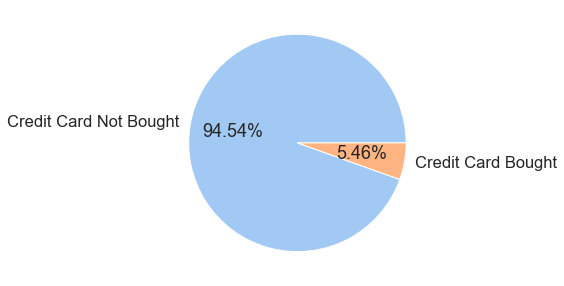

Inconsistent


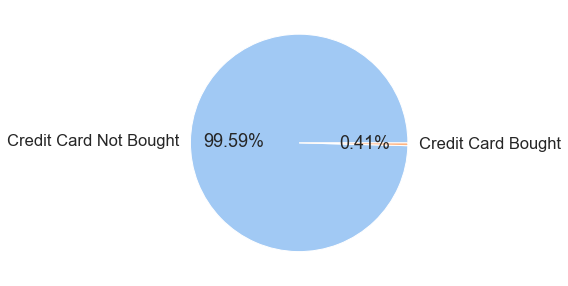

In [364]:
labels=['Credit Card Not Bought','Credit Card Bought']
data=[consistent.num_credit_cards.value_counts().values[0],consistent.num_credit_cards.value_counts().values[1]]
colors = sns.color_palette('pastel')[0:2]
fig=plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
print('Consistent')
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()
#labels=['consistent','inconsistent']
data=[inconsistent.num_credit_cards.value_counts().values[0],inconsistent.num_credit_cards.value_counts().values[1]]
colors = sns.color_palette('pastel')[0:2]
fig=plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
print('Inconsistent')
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

In [361]:
inconsistent.num_credit_cards.value_counts()

0    4370
1      18
Name: num_credit_cards, dtype: int64

Consistent


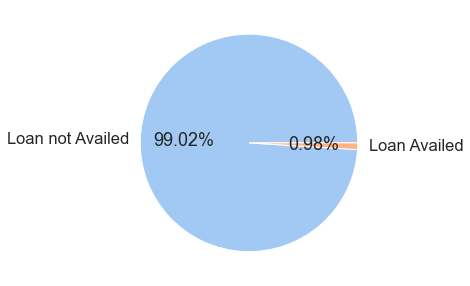

Inconsistent


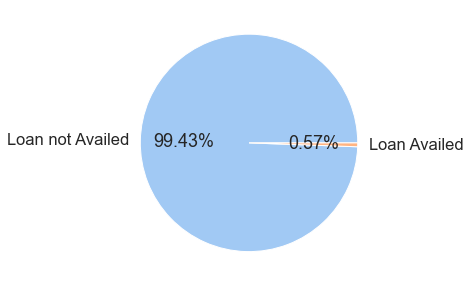

In [365]:
labels=['Loan not Availed','Loan Availed']
data=[consistent.num_loans.value_counts().values[0],consistent.num_loans.value_counts().values[1]]
colors = sns.color_palette('pastel')[0:2]
fig=plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
print('Consistent')
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()
#labels=['consistent','inconsistent']
data=[inconsistent.num_loans.value_counts().values[0],inconsistent.num_loans.value_counts().values[1]]
colors = sns.color_palette('pastel')[0:2]
fig=plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
print('Inconsistent')
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

> - The ratio of females who are consistent is slightlty higher than ratio of males who are consistent
> - VIP is a segment that is highly consistent compared to othe segments
> - As consistent people include people who stayed active throughout the study period, they buy more products compared to the inconsistent people.
> - The ratio of people who buy credit cards is very less among the Inconsistent people compared to consistent people
> - The ratio of people who avail loans is 0.05% for the Inconsistent people compared to 1% among consistent people.

## Generate elaborate profiles for the following four groups:
 - a. Active at the start but inactive at the end
 - b. Active at the start and active by the end
 - c. Inactive at the start but active at the end
 - d. Inactive at the start and inactive at the end


(a) Active at the start but Inactive at the end (A0)

In [322]:
A0.describe().T

count           mean           std           min  \
age                    2014.0      43.469215     17.317720      5.000000   
gross_income           2014.0  125881.048078  82469.687117  21922.380000   
num_credit_cards       2014.0       0.006951      0.083105      0.000000   
ind_actividad_cliente  2014.0       0.000000      0.000000      0.000000   
num_Products           2014.0       0.783019      0.687761      0.000000   
num_loans              2014.0       0.012413      0.110748      0.000000   
duration               2014.0    3383.135055   2330.426951    366.000000   
log_gross_income       2014.0      11.562072      0.595663      9.995263   

                                25%            50%          75%            max  
age                       26.000000      43.000000      55.0000      87.000000  
gross_income           68492.197500  103546.155000  154322.5425  509781.030000  
num_credit_cards           0.000000       0.000000       0.0000       1.000000  
ind_actividad_cliente      0.000000       0.000000       0.0000       0.000000  
num_Products               0.000000       1.000000       1.0000       4.000000  
num_loans                  0.000000       0.000000       0.0000       1.000000  
duration                 965.000000    3607.500000    5453.5000    7794.000000  
log_gross_income          11.134475      11.547773      11.9468      13.141737

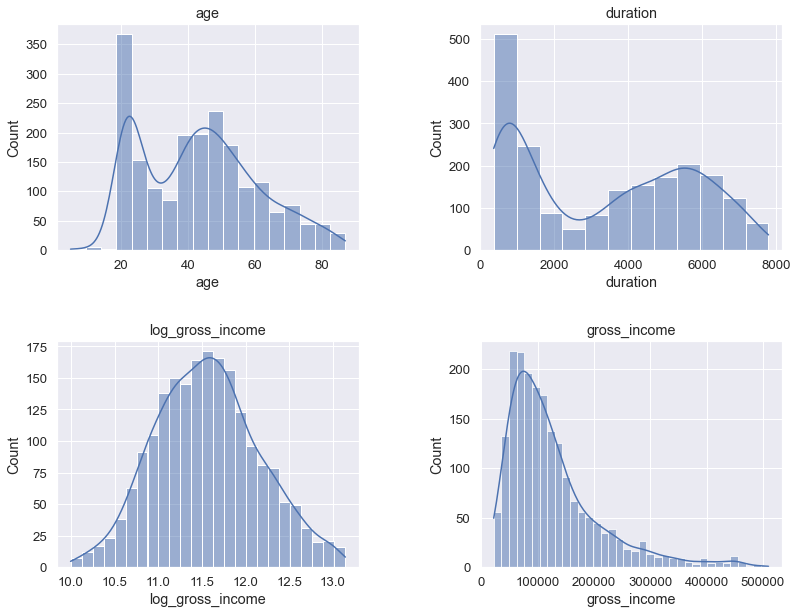

In [323]:
fig=plt.figure(figsize=(13,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
sns.set(font_scale = 1.2)
for attr, i in zip(['age','duration','log_gross_income','gross_income'],range(1,5)):
    ax=fig.add_subplot(2,2,i)
    ax.set_title(attr)
    sns.histplot(A0[attr],kde=True)
plt.show()

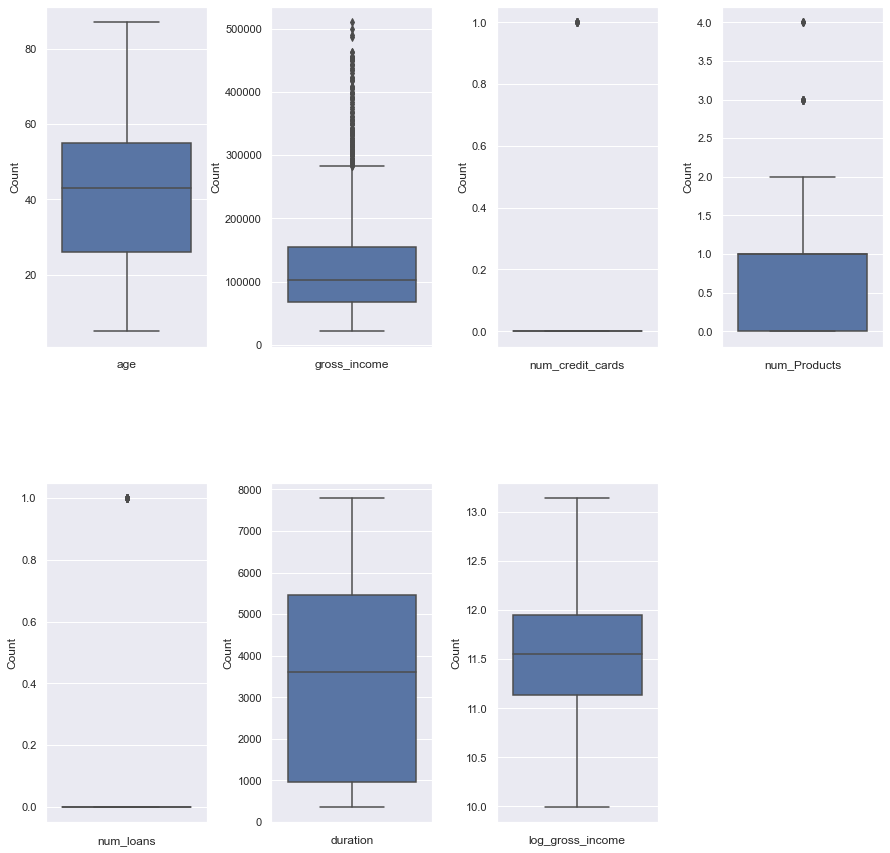

In [324]:
### Boxplots
fig=plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for attr,i in zip(num_keys+['log_gross_income'],range(1,8)):
    sns.set(font_scale = 1)
    ax=fig.add_subplot(2,4,i)
    sns.boxplot(y=A0[attr],ax=ax)
    plt.xlabel(attr)
    plt.ylabel('Count')
plt.show()

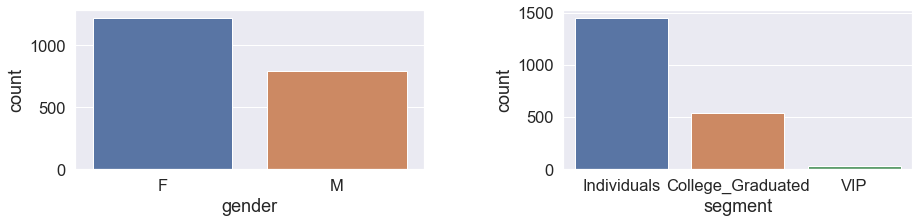

In [325]:
fig=plt.figure(figsize=(15,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for attr,i in zip(['gender','segment'],range(1,5)):
    sns.set(font_scale = 1.5)
    ax=fig.add_subplot(2,2,i)
    sns.countplot(x=attr,data=A0)
    plt.xlabel(attr)
plt.show()

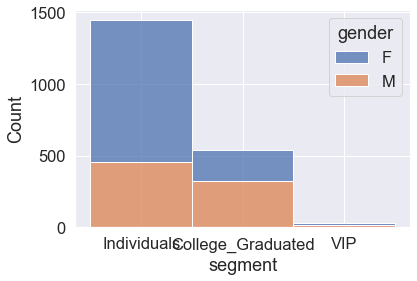

In [326]:
sns.histplot(binwidth=0.5, x='segment', hue='gender', data=A0, stat="count", multiple="stack")
plt.show()

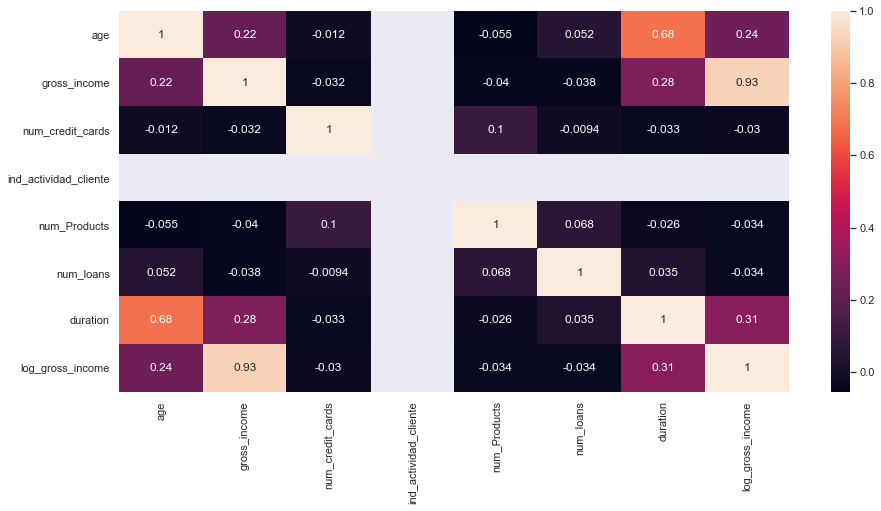

In [327]:
fig=plt.figure(figsize=(15,7))
sns.set(font_scale = 1)
sns.heatmap(A0.corr(),annot=True)
plt.show()

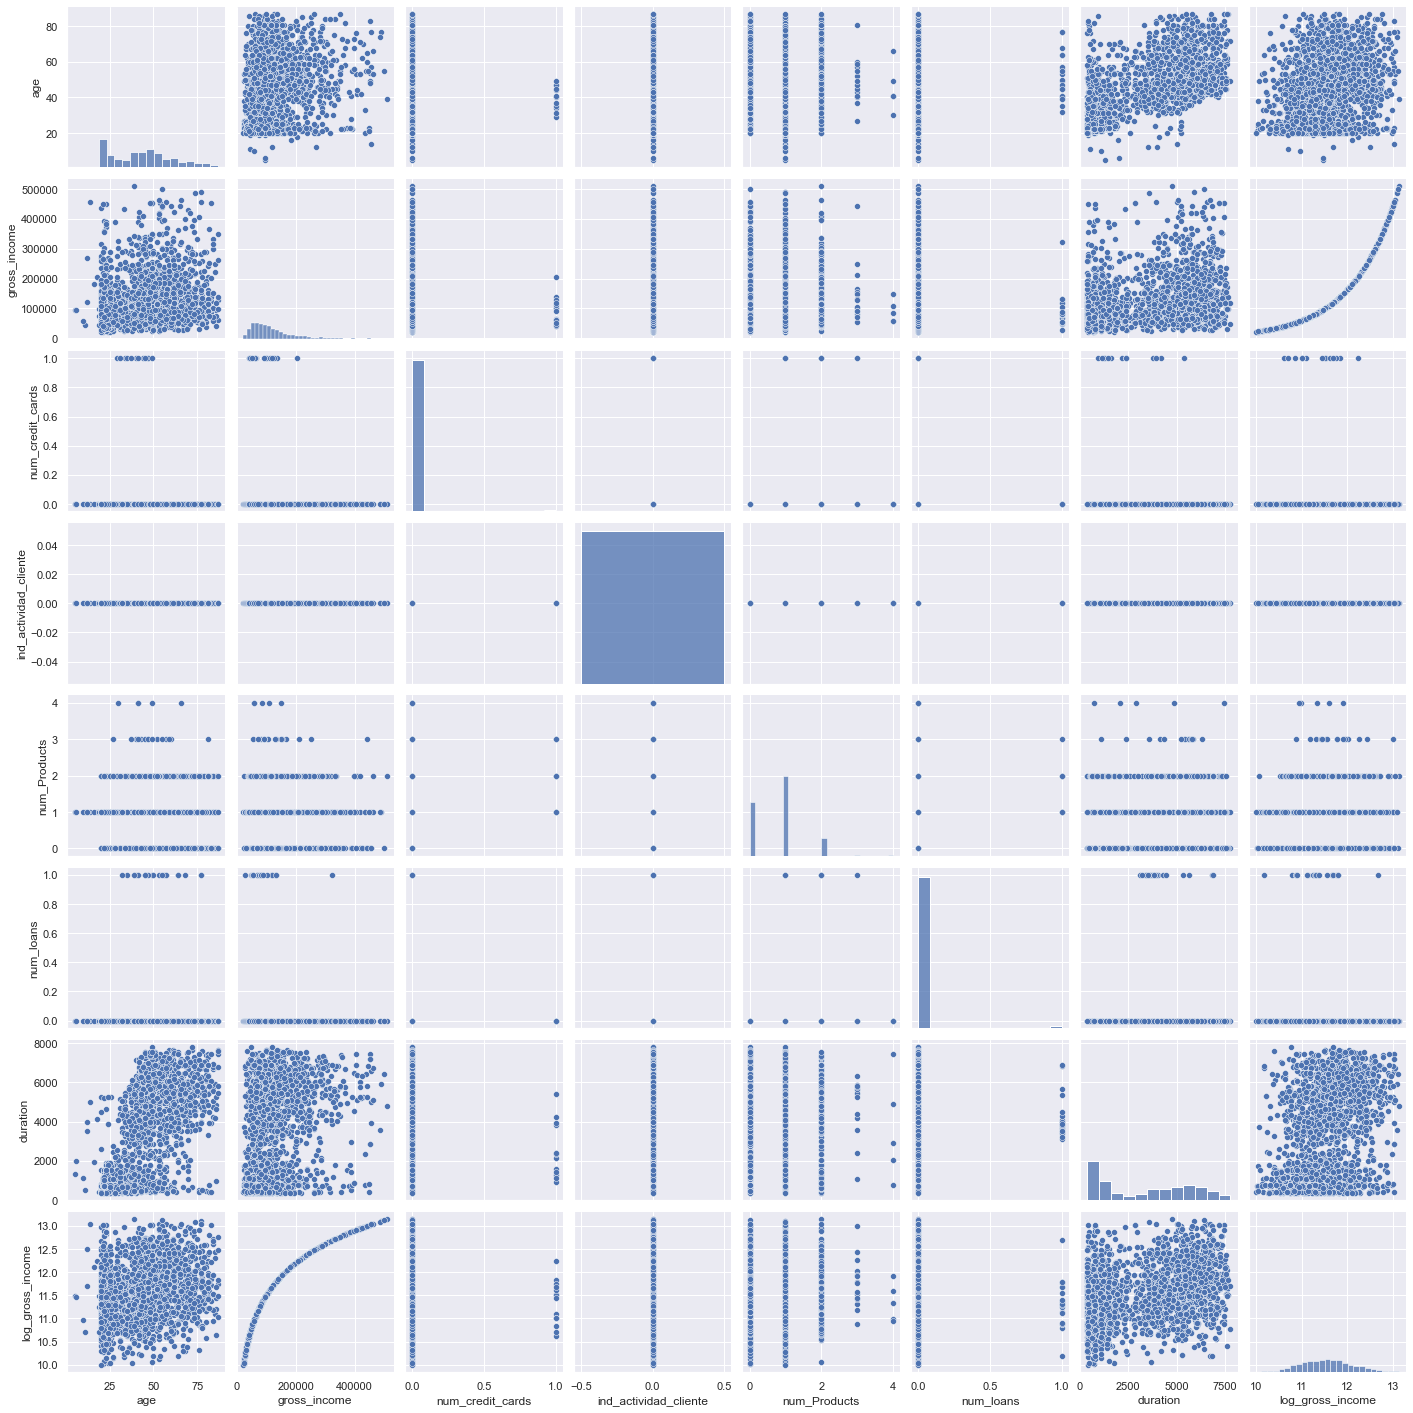

In [328]:
sns.pairplot(A0)

(b) Active at the start and active at the end (A1)

In [329]:
A1.describe().T

count           mean           std           min  \
age                    22356.0      43.218152     15.427514      2.000000   
gross_income           22356.0  130464.445604  80280.616881  20544.420000   
num_credit_cards       22356.0       0.117373      0.321872      0.000000   
ind_actividad_cliente  22356.0       1.000000      0.000000      1.000000   
num_Products           22356.0       2.579173      1.879802      0.000000   
num_loans              22356.0       0.021202      0.144062      0.000000   
duration               22356.0    3287.520442   2123.981034    366.000000   
log_gross_income       22356.0      11.613910      0.572921      9.930345   

                                25%            50%            75%  \
age                       32.000000      43.000000      52.000000   
gross_income           73975.912500  109553.745000  164043.030000   
num_credit_cards           0.000000       0.000000       0.000000   
ind_actividad_cliente      1.000000       1.000000       1.000000   
num_Products               1.000000       2.000000       3.000000   
num_loans                  0.000000       0.000000       0.000000   
duration                1189.000000    3159.000000    5249.750000   
log_gross_income          11.211495      11.604171      12.007884   

                                max  
age                        87.00000  
gross_income           513379.29000  
num_credit_cards            1.00000  
ind_actividad_cliente       1.00000  
num_Products               13.00000  
num_loans                   1.00000  
duration                 7909.00000  
log_gross_income           13.14877

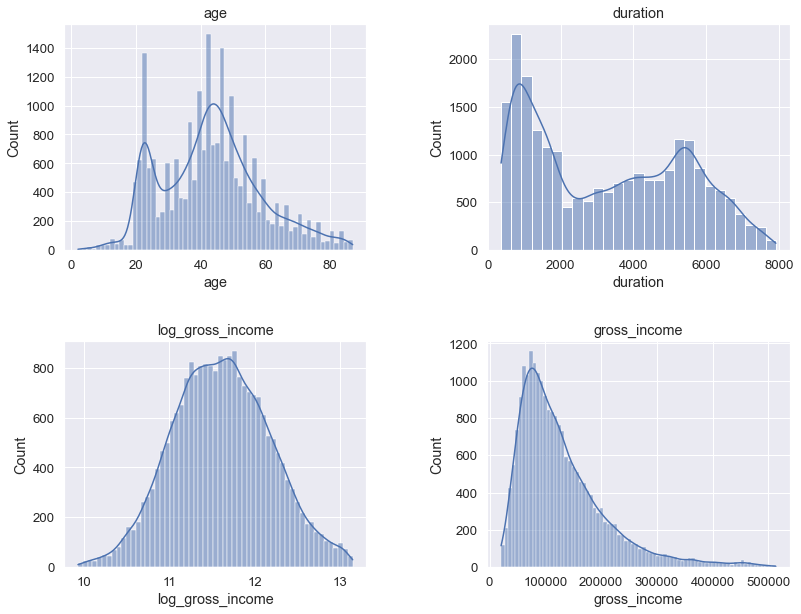

In [330]:
fig=plt.figure(figsize=(13,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
sns.set(font_scale = 1.2)
for attr, i in zip(['age','duration','log_gross_income','gross_income'],range(1,5)):
    ax=fig.add_subplot(2,2,i)
    ax.set_title(attr)
    sns.histplot(A1[attr],kde=True)
plt.show()

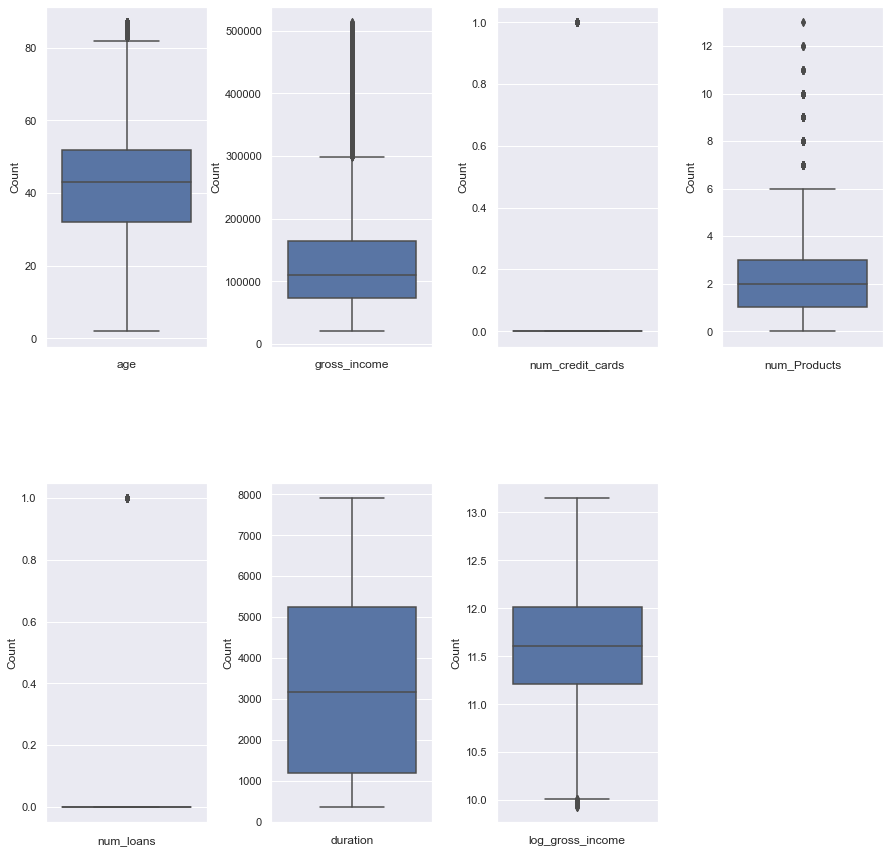

In [331]:
### Boxplots
fig=plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for attr,i in zip(num_keys+['log_gross_income'],range(1,8)):
    sns.set(font_scale = 1)
    ax=fig.add_subplot(2,4,i)
    sns.boxplot(y=A1[attr],ax=ax)
    plt.xlabel(attr)
    plt.ylabel('Count')
plt.show()

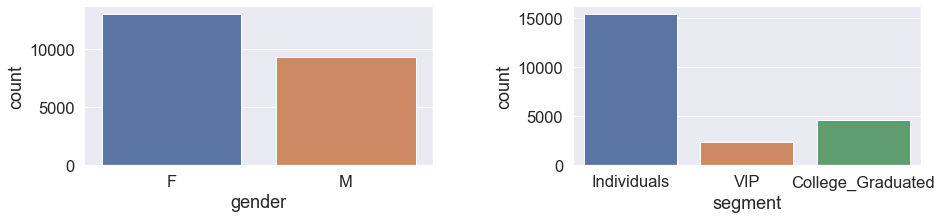

In [332]:
fig=plt.figure(figsize=(15,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for attr,i in zip(['gender','segment'],range(1,5)):
    sns.set(font_scale = 1.5)
    ax=fig.add_subplot(2,2,i)
    sns.countplot(x=attr,data=A1)
    plt.xlabel(attr)
plt.show()

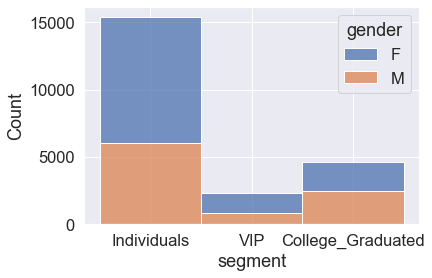

In [333]:
sns.histplot(binwidth=0.5, x='segment', hue='gender', data=A1, stat="count", multiple="stack")
plt.show()

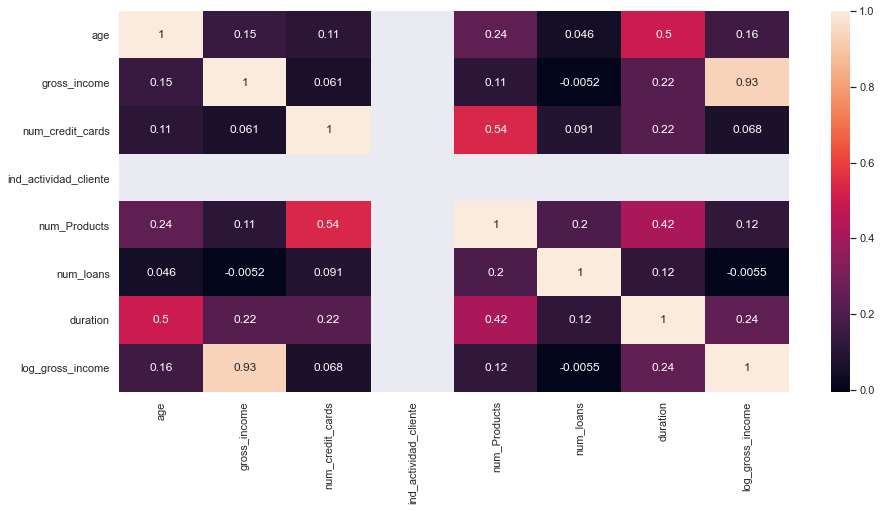

In [334]:
fig=plt.figure(figsize=(15,7))
sns.set(font_scale = 1)
sns.heatmap(A1.corr(),annot=True)
plt.show()

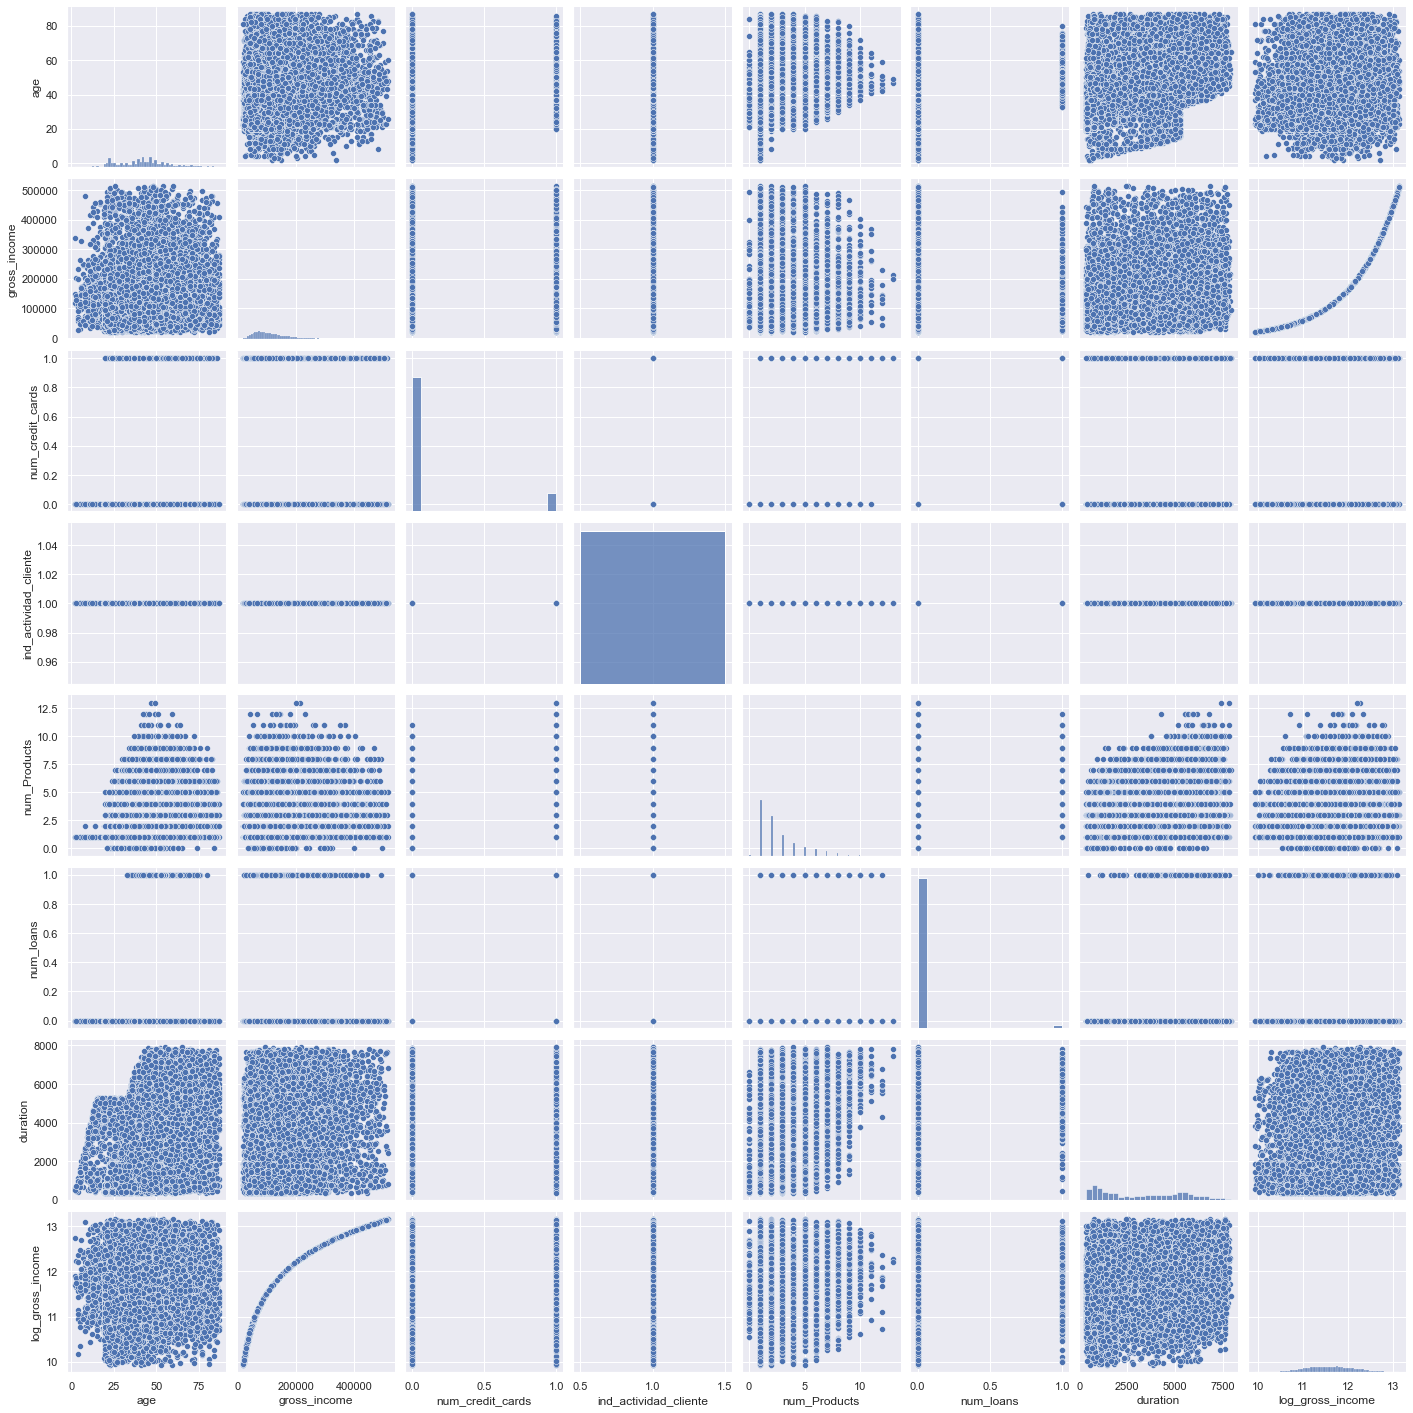

In [335]:
sns.pairplot(A1)

(c) Inactive at the start and active at the end (I1)

In [336]:
I1.describe().T

count           mean           std           min  \
age                    2374.0      39.076243     16.654988      2.000000   
gross_income           2374.0  118576.073429  76091.514107  21606.330000   
num_credit_cards       2374.0       0.001685      0.041022      0.000000   
ind_actividad_cliente  2374.0       1.000000      0.000000      1.000000   
num_Products           2374.0       1.274642      0.529347      0.000000   
num_loans              2374.0       0.000000      0.000000      0.000000   
duration               2374.0    2630.923757   1867.300935    366.000000   
log_gross_income       2374.0      11.510986      0.579989      9.980742   

                                25%           50%           75%            max  
age                       24.000000     37.000000      49.00000      87.000000  
gross_income           67172.775000  97362.090000  146077.12500  513830.490000  
num_credit_cards           0.000000      0.000000       0.00000       1.000000  
ind_actividad_cliente      1.000000      1.000000       1.00000       1.000000  
num_Products               1.000000      1.000000       1.00000       4.000000  
num_loans                  0.000000      0.000000       0.00000       0.000000  
duration                1088.000000   1818.500000    4251.00000    7879.000000  
log_gross_income          11.115023     11.486192      11.89189      13.149649

In [337]:
I1.describe(include='object').T.iloc[0:2]

count unique          top  freq
gender   2374      2            F  1262
segment  2374      3  Individuals  1431

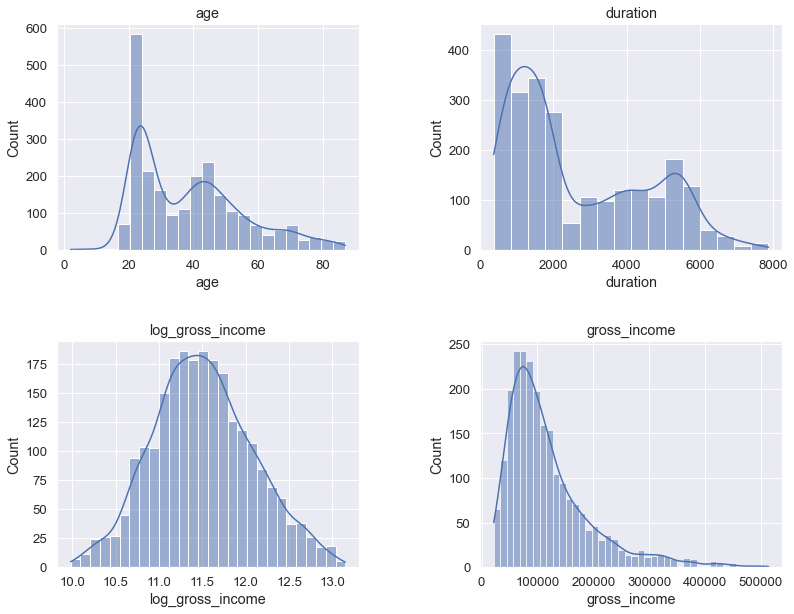

In [338]:
fig=plt.figure(figsize=(13,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
sns.set(font_scale = 1.2)
for attr, i in zip(['age','duration','log_gross_income','gross_income'],range(1,5)):
    ax=fig.add_subplot(2,2,i)
    ax.set_title(attr)
    sns.histplot(I1[attr],kde=True)
plt.show()

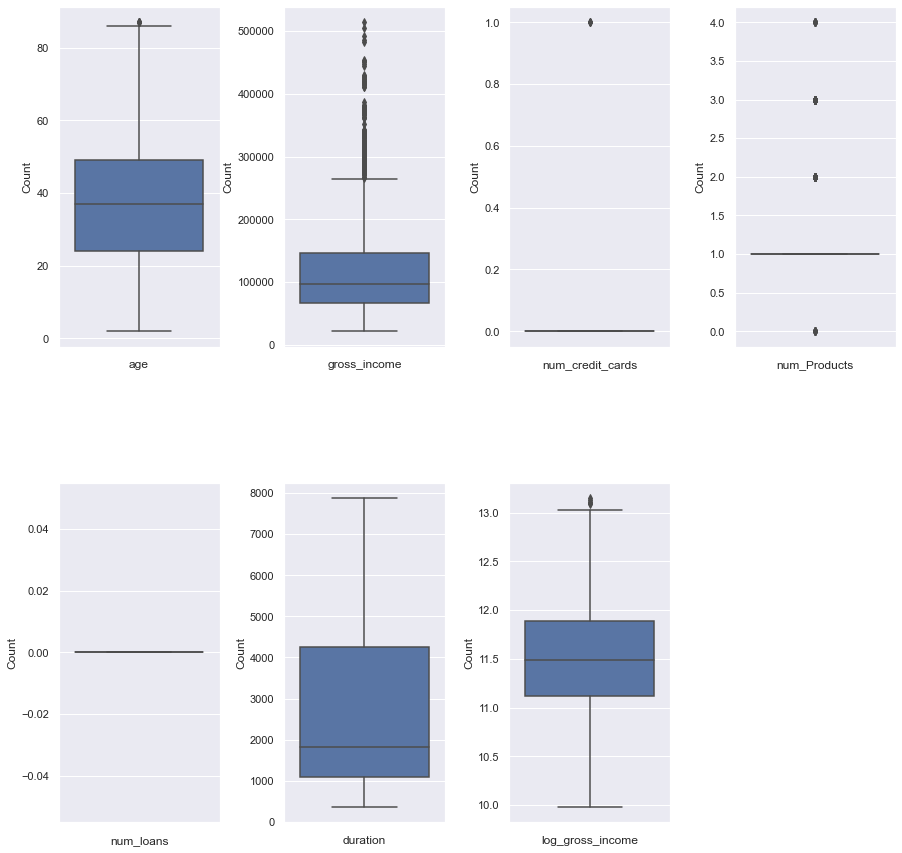

In [339]:
### Boxplots
fig=plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for attr,i in zip(num_keys+['log_gross_income'],range(1,8)):
    sns.set(font_scale = 1)
    ax=fig.add_subplot(2,4,i)
    sns.boxplot(y=I1[attr],ax=ax)
    plt.xlabel(attr)
    plt.ylabel('Count')
plt.show()

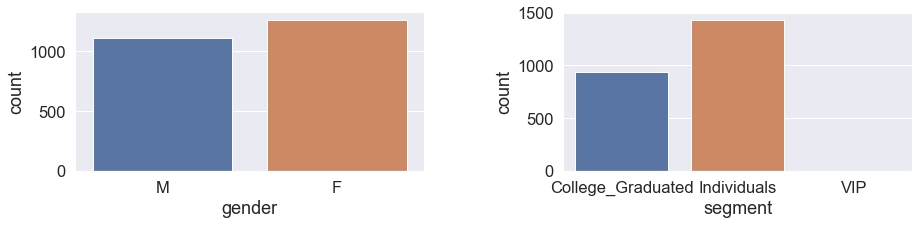

In [340]:
fig=plt.figure(figsize=(15,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for attr,i in zip(['gender','segment'],range(1,5)):
    sns.set(font_scale = 1.5)
    ax=fig.add_subplot(2,2,i)
    sns.countplot(x=attr,data=I1)
    plt.xlabel(attr)
plt.show()

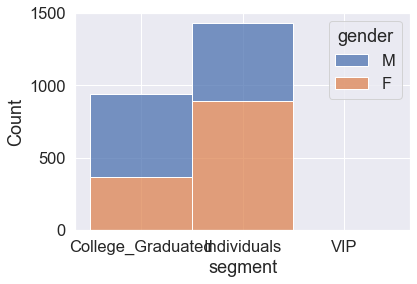

In [341]:
sns.histplot(binwidth=0.5, x='segment', hue='gender', data=I1, stat="count", multiple="stack")
plt.show()

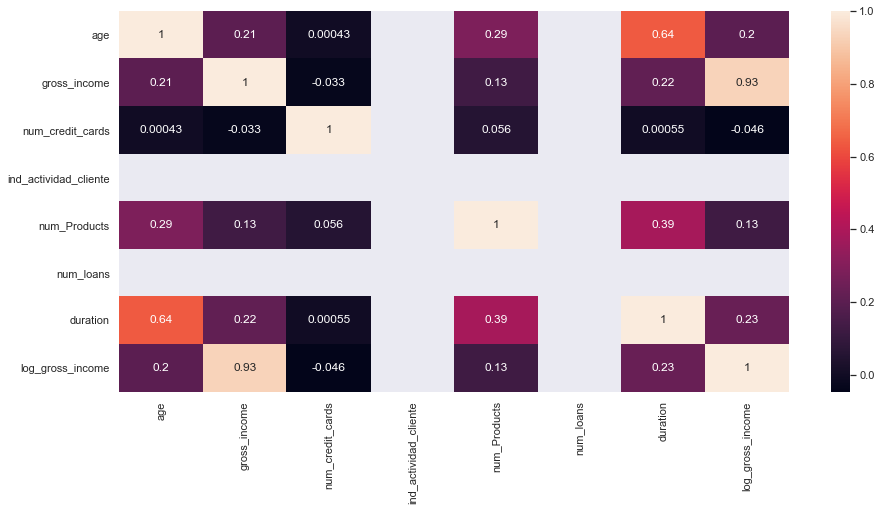

In [342]:
fig=plt.figure(figsize=(15,7))
sns.set(font_scale = 1)
sns.heatmap(I1.corr(),annot=True)
plt.show()

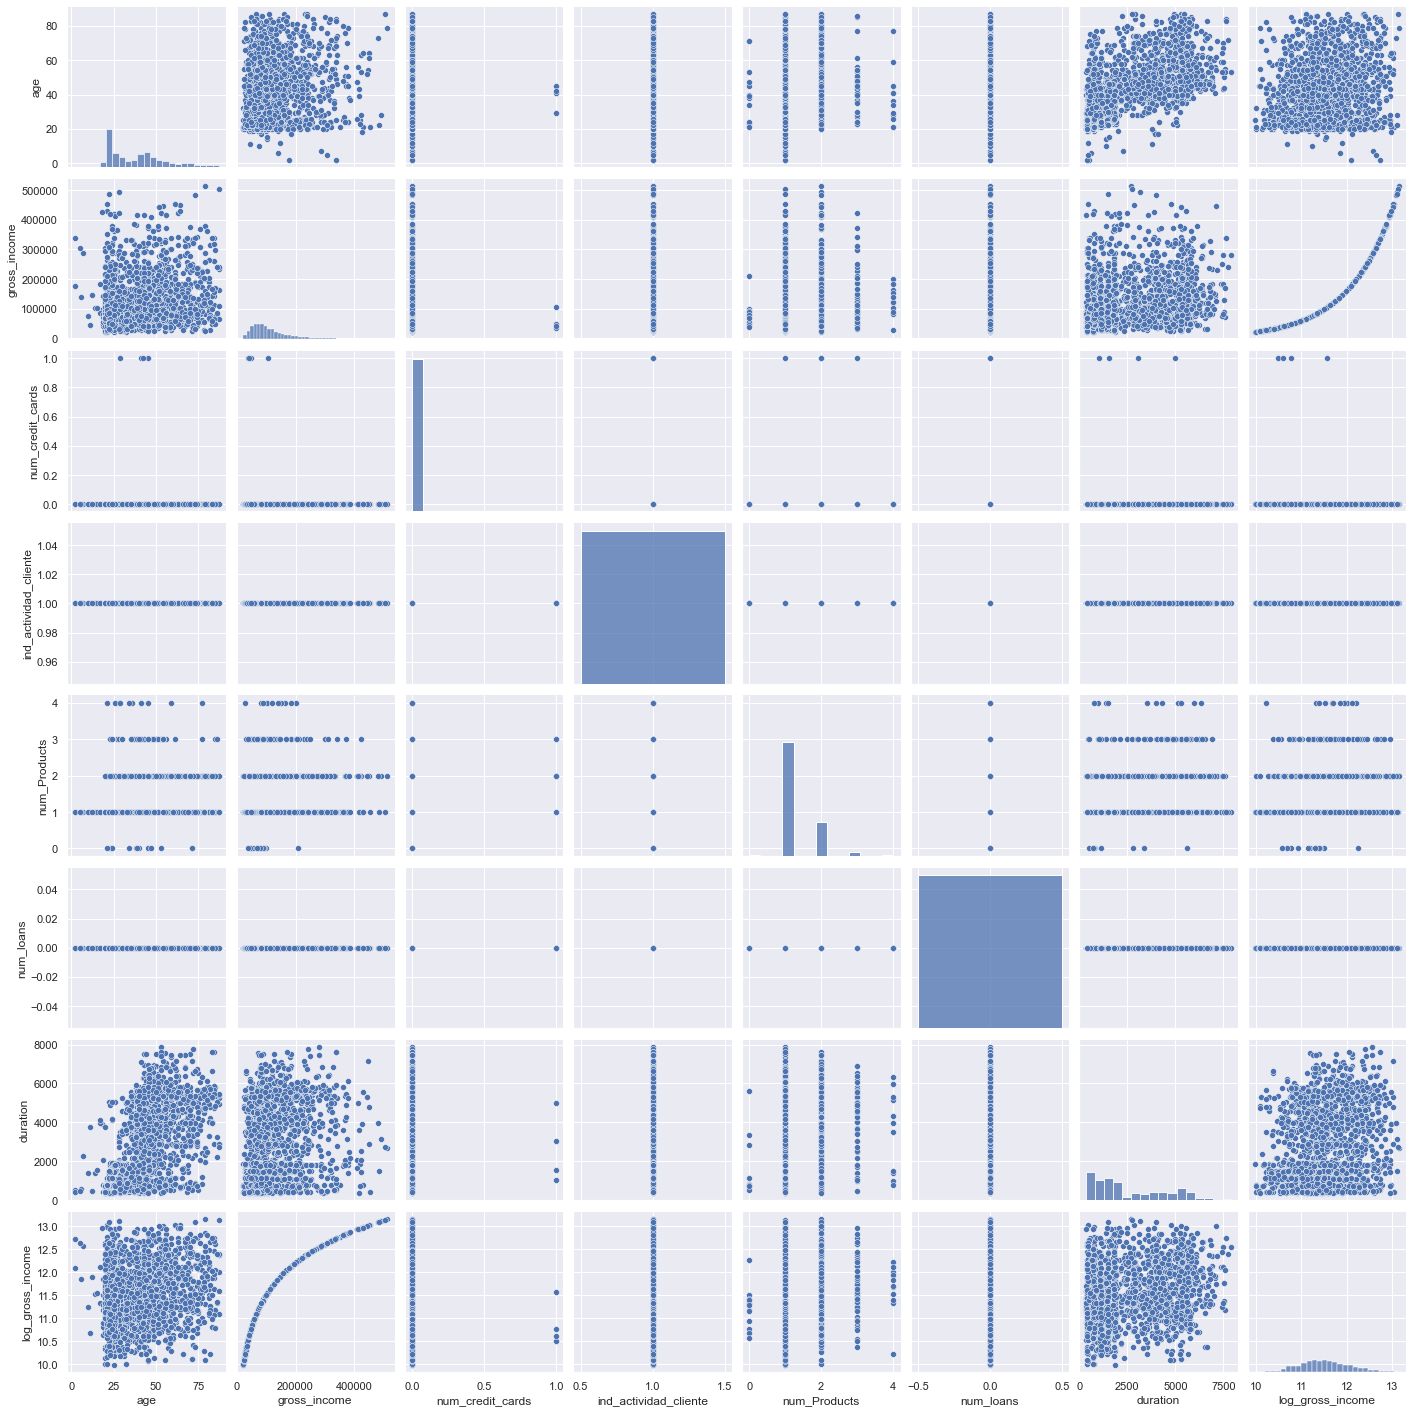

In [343]:
sns.pairplot(I1)

(d) Active at the start and active at the end (I0)

In [344]:
I0.describe().T

count           mean           std           min  \
age                    25774.0      37.258439     16.342541      3.000000   
gross_income           25774.0  116410.306144  76852.963578  20581.710000   
num_credit_cards       25774.0       0.000078      0.008809      0.000000   
ind_actividad_cliente  25774.0       0.000000      0.000000      0.000000   
num_Products           25774.0       0.720726      0.547364      0.000000   
num_loans              25774.0       0.000000      0.000000      0.000000   
duration               25774.0    2528.282455   1835.030029    366.000000   
log_gross_income       25774.0      11.486332      0.587809      9.932158   

                                25%           50%           75%            max  
age                       24.000000     31.000000      48.00000      87.000000  
gross_income           64500.360000  93933.660000  143708.16750  513969.150000  
num_credit_cards           0.000000      0.000000       0.00000       1.000000  
ind_actividad_cliente      0.000000      0.000000       0.00000       0.000000  
num_Products               0.000000      1.000000       1.00000       4.000000  
num_loans                  0.000000      0.000000       0.00000       0.000000  
duration                1082.000000   1768.000000    3823.75000    7879.000000  
log_gross_income          11.074426     11.450344      11.87554      13.149919

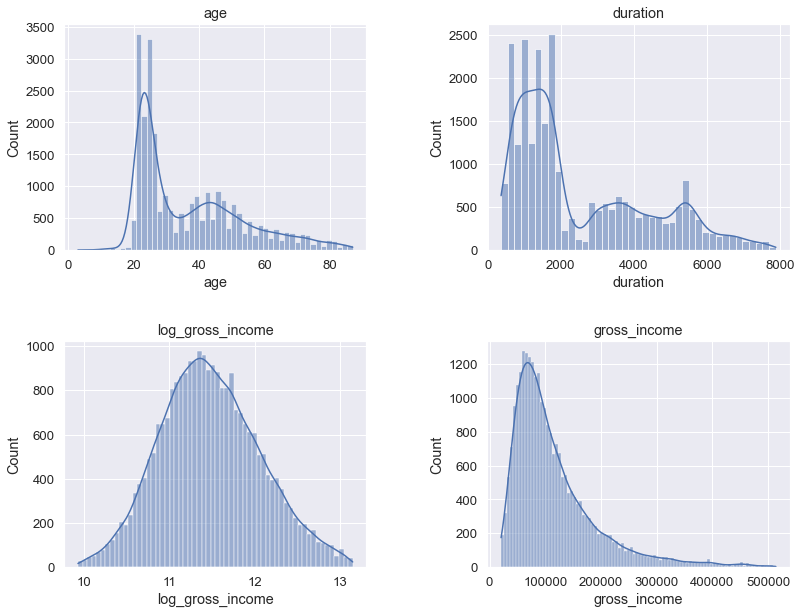

In [345]:
fig=plt.figure(figsize=(13,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
sns.set(font_scale = 1.2)
for attr, i in zip(['age','duration','log_gross_income','gross_income'],range(1,5)):
    ax=fig.add_subplot(2,2,i)
    ax.set_title(attr)
    sns.histplot(I0[attr],kde=True)
plt.show()

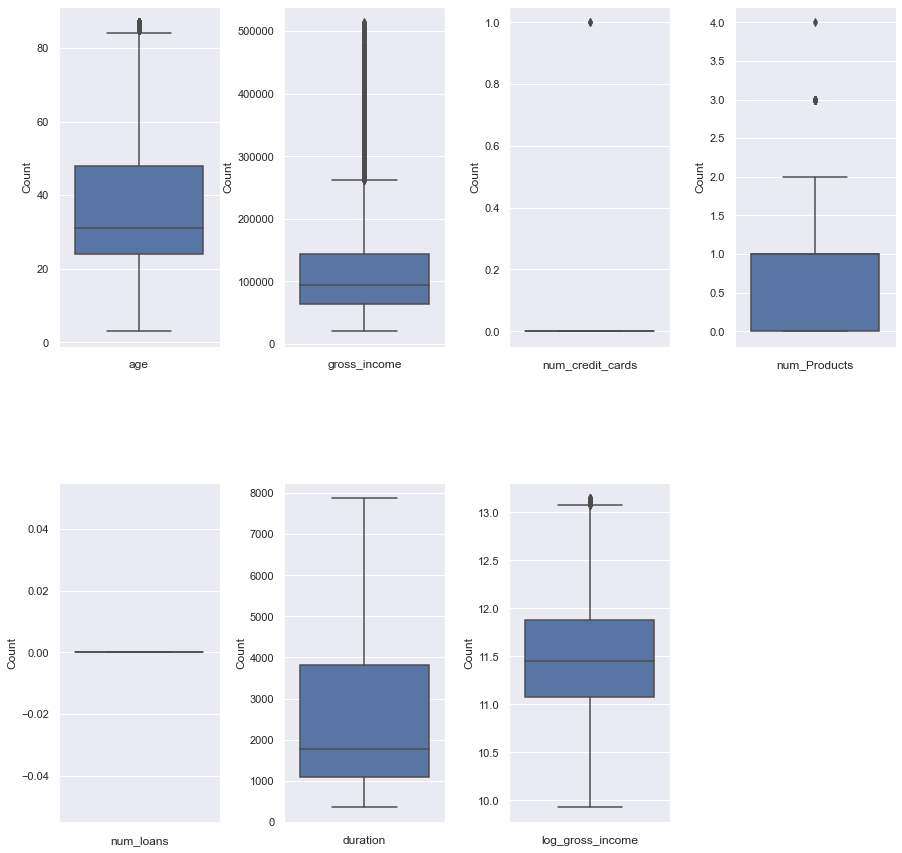

In [346]:
### Boxplots
fig=plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for attr,i in zip(num_keys+['log_gross_income'],range(1,8)):
    sns.set(font_scale = 1)
    ax=fig.add_subplot(2,4,i)
    sns.boxplot(y=I0[attr],ax=ax)
    plt.xlabel(attr)
    plt.ylabel('Count')
plt.show()

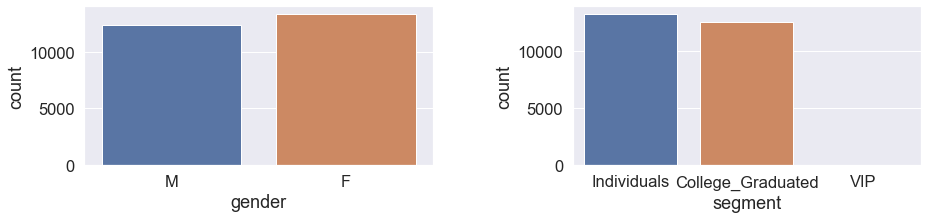

In [347]:
fig=plt.figure(figsize=(15,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for attr,i in zip(['gender','segment'],range(1,5)):
    sns.set(font_scale = 1.5)
    ax=fig.add_subplot(2,2,i)
    sns.countplot(x=attr,data=I0)
    plt.xlabel(attr)
plt.show()

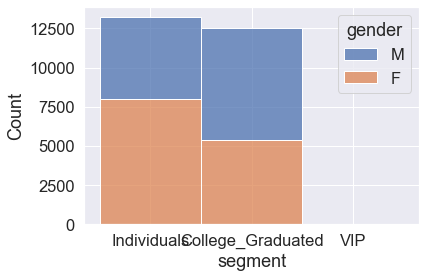

In [348]:
sns.histplot(binwidth=0.5, x='segment', hue='gender', data=I0, stat="count", multiple="stack")
plt.show()

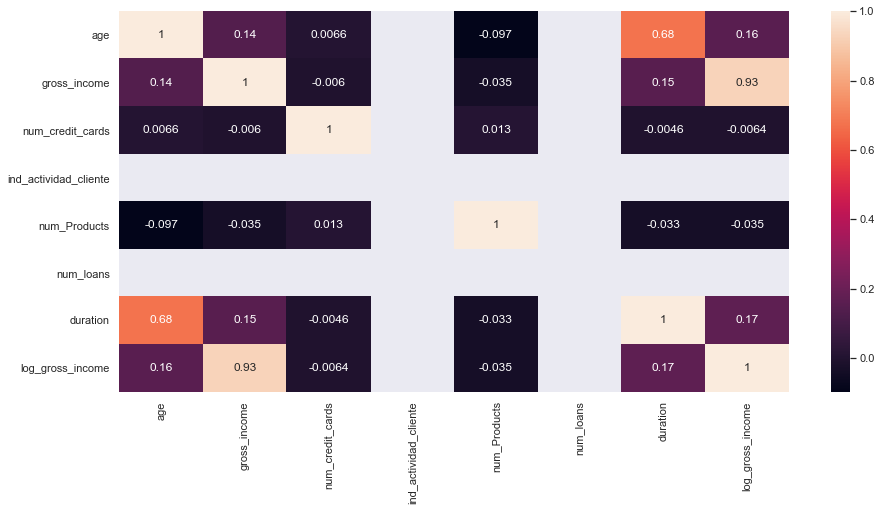

In [349]:
fig=plt.figure(figsize=(15,7))
sns.set(font_scale = 1)
sns.heatmap(I0.corr(),annot=True)
plt.show()

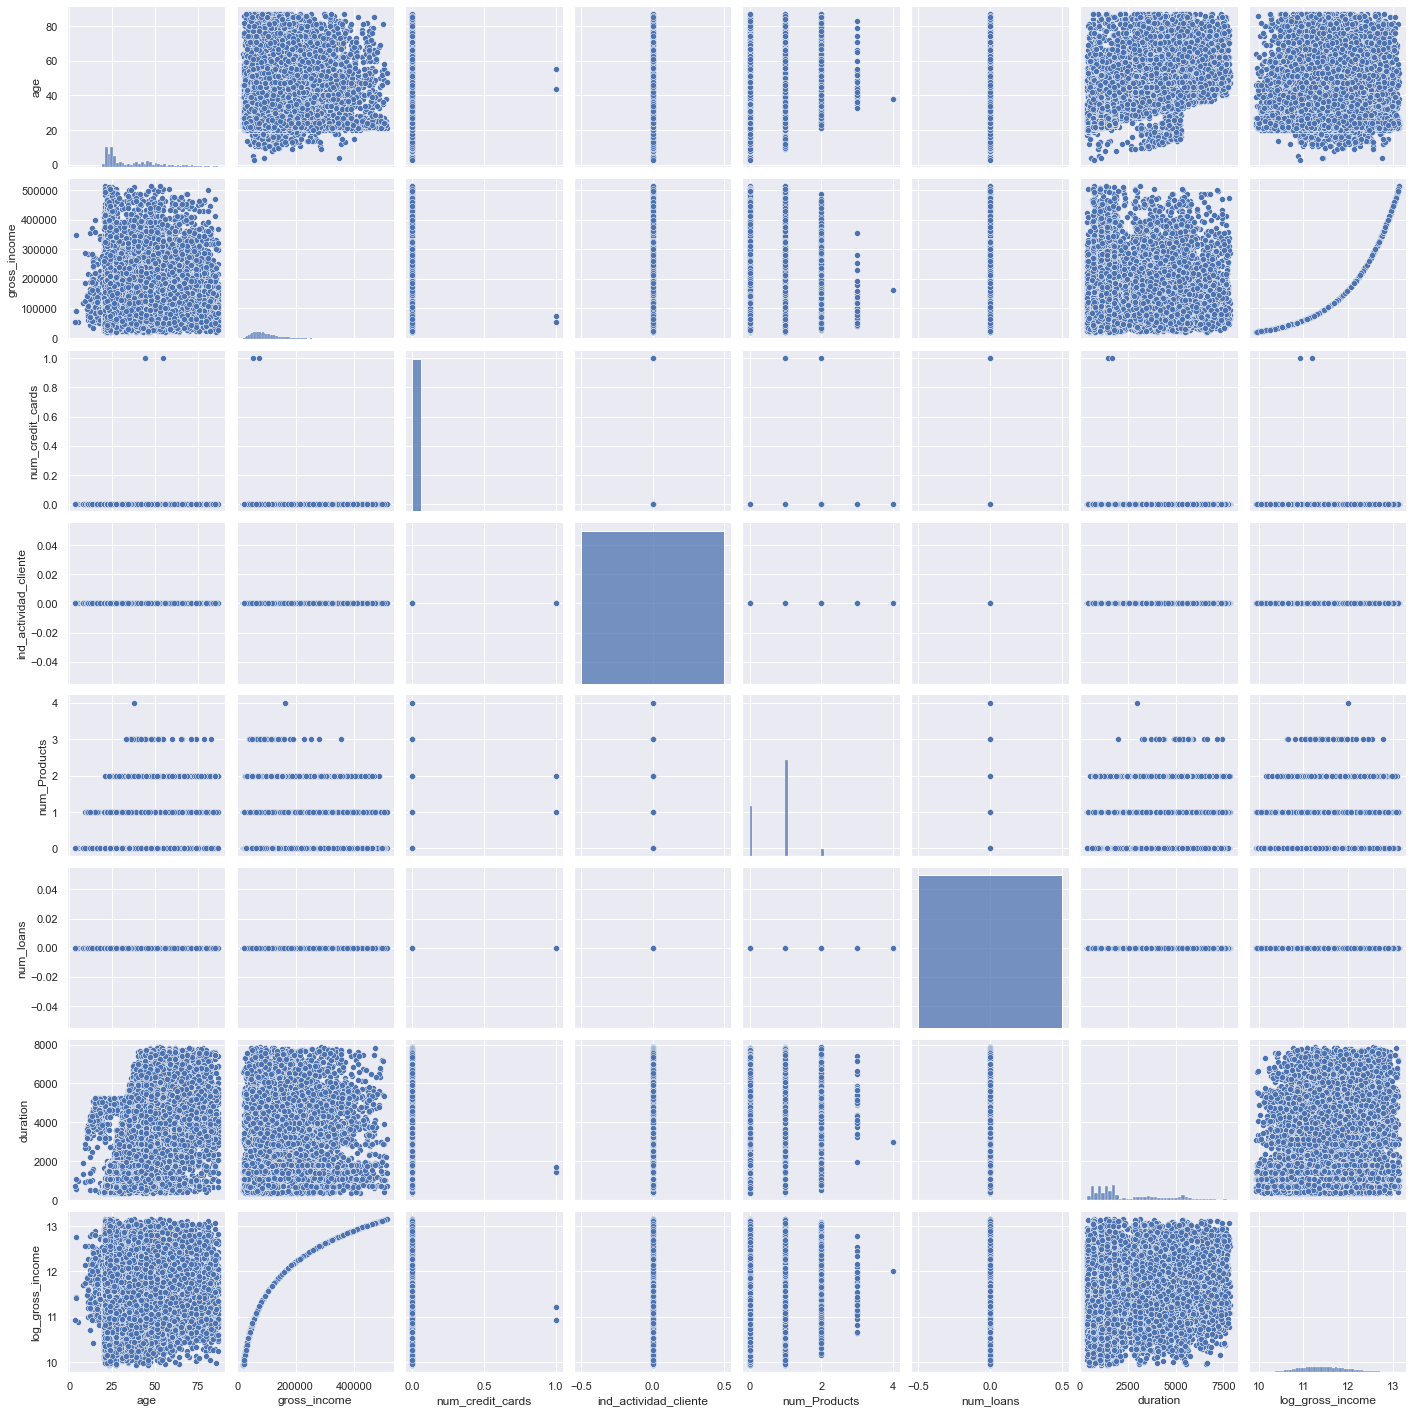

In [350]:
sns.pairplot(I0)

### Comparing the 4 profiles

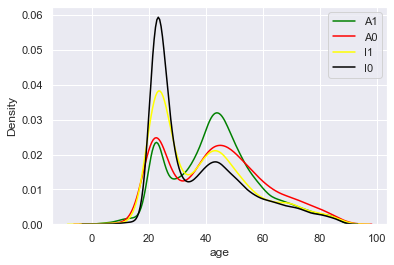

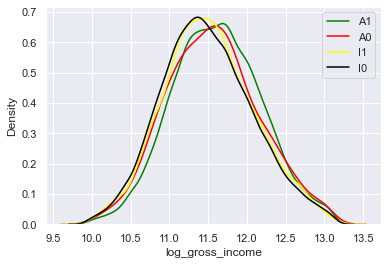

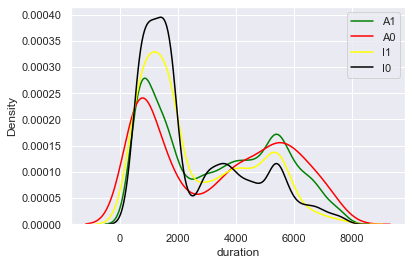

In [351]:
for attr in[ 'age','log_gross_income','duration']:
    sns.set(font_scale = 1)
    sns.kdeplot(A1[attr],color='green')
    sns.kdeplot(A0[attr],color='red')
    sns.kdeplot(I1[attr],color='yellow')
    sns.kdeplot(I0[attr],color='black')
    plt.legend(['A1','A0','I1','I0'])
    plt.show()

In [352]:
import scipy.stats as stats
for attr in ['age','gross_income','log_gross_income','duration']:
    print('A1-A0:',attr,":",stats.mannwhitneyu(A1[attr],A0[attr], use_continuity=True, alternative='two-sided'))
    print('A1-I1:',attr,":",stats.mannwhitneyu(A1[attr],A0[attr], use_continuity=True, alternative='two-sided'))
    print('A1-I0:',attr,":",stats.mannwhitneyu(A1[attr],A0[attr], use_continuity=True, alternative='two-sided'))
    print('A0-I1:',attr,":",stats.mannwhitneyu(A1[attr],A0[attr], use_continuity=True, alternative='two-sided'))
    print('A0-I0:',attr,":",stats.mannwhitneyu(A1[attr],A0[attr], use_continuity=True, alternative='two-sided'))
    print('I1-I0:',attr,":",stats.mannwhitneyu(A1[attr],A0[attr], use_continuity=True, alternative='two-sided'),"\n__________")
    

A1-A0: age : MannwhitneyuResult(statistic=22584163.5, pvalue=0.8126002128669453)
A1-I1: age : MannwhitneyuResult(statistic=22584163.5, pvalue=0.8126002128669453)
A1-I0: age : MannwhitneyuResult(statistic=22584163.5, pvalue=0.8126002128669453)
A0-I1: age : MannwhitneyuResult(statistic=22584163.5, pvalue=0.8126002128669453)
A0-I0: age : MannwhitneyuResult(statistic=22584163.5, pvalue=0.8126002128669453)
I1-I0: age : MannwhitneyuResult(statistic=22584163.5, pvalue=0.8126002128669453) 
__________
A1-A0: gross_income : MannwhitneyuResult(statistic=23762004.5, pvalue=3.5951199297735496e-05)
A1-I1: gross_income : MannwhitneyuResult(statistic=23762004.5, pvalue=3.5951199297735496e-05)
A1-I0: gross_income : MannwhitneyuResult(statistic=23762004.5, pvalue=3.5951199297735496e-05)
A0-I1: gross_income : MannwhitneyuResult(statistic=23762004.5, pvalue=3.5951199297735496e-05)
A0-I0: gross_income : MannwhitneyuResult(statistic=23762004.5, pvalue=3.5951199297735496e-05)
I1-I0: gross_income : Mannwhitne

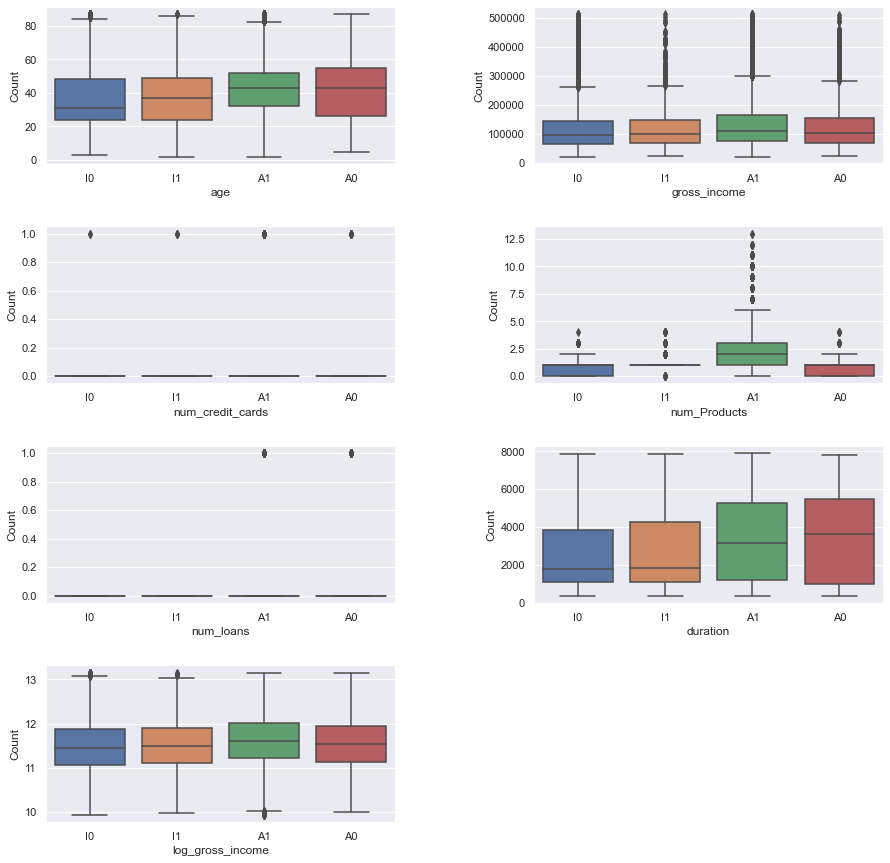

In [353]:
### Boxplots
fig=plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for attr,i in zip(num_keys+['log_gross_income'],range(1,8)):
    sns.set(font_scale = 1)
    ax=fig.add_subplot(4,2,i)
    sns.boxplot(x='activity',y=attr,ax=ax,data=df)
    plt.xlabel(attr)
    plt.ylabel('Count')
plt.show()

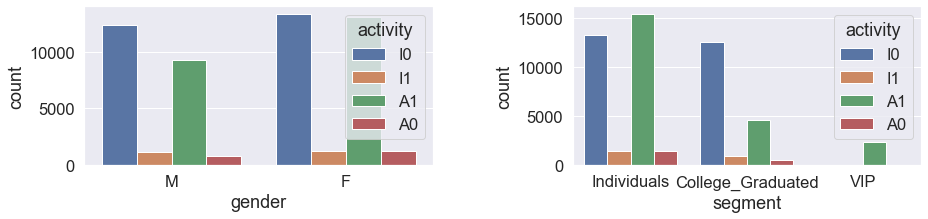

In [354]:
fig=plt.figure(figsize=(15,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for attr,i in zip(['gender','segment'],range(1,5)):
    sns.set(font_scale = 1.5)
    ax=fig.add_subplot(2,2,i)
    sns.countplot(x=attr,data=df,hue='activity')
    plt.xlabel(attr)
plt.show()